In [ ]:
import gvar as gv 
phys_point_data = {
    'a' : gv.gvar(0),
    'hbarc' : gv.gvar(197.3269804),
    'Ds_phys' : gv.gvar('1672.43(32)') }
def y(fit_data):
    make_gvar = lambda g : gv.gvar(gv.mean(g), gv.sdev(g))

    output = {}
    output['Ds'] = make_gvar(phys_point_data['Ds_phys'] /fit_data['a'])
    return output


In [20]:
import h5py
import gvar as gv
import numpy as np
import matplotlib.pyplot as plt
import lsqfit
import h5py
import gvar as gv
import numpy as np

# Step 1: Load and process correlators from HDF5
averaged_data = {}
with h5py.File("D_s_final.h5", 'r') as f:
    ds_group = f["D_s"]
    cfg_keys = [key for key in ds_group.keys() if key.startswith("cfg_")]
    masses = sorted(['0.35', '0.365', '0.385', '0.4'])
    print(f"Using masses: {masses}")
    for mass in masses:
        correlators = []
        for cfg_key in cfg_keys:
            correlator_key = f"D_s/{cfg_key}/mass_{mass}/smsm/gamma_15/mom_0/correlator"
            if correlator_key in f:
                correlators.append(f[correlator_key][:])
        if correlators:
            avg_correlator = gv.dataset.avg_data(correlators)
            folded_correlator = 0.5 * (avg_correlator + avg_correlator[::-1])
            averaged_data[mass] = folded_correlator  # Flatten to mass -> folded_correlator
        else:
            print(f"No smsm data for mass_{mass}")

effective_mass = {}
for mass in averaged_data:
    effective_mass[mass] = np.log(
        averaged_data[mass][0:30] / np.roll(averaged_data[mass][0:30], -1)
    )  # Flatten to mass -> effective_mass
    if not effective_mass[mass].size:  # Check if empty (e.g., due to invalid data)
        print(f"No valid effective mass data for mass_{mass}")
        del effective_mass[mass]

print("Flattened effective_mass:")
print(effective_mass)
fit_data = effective_mass
# make y data 
make_gvar = lambda g : gv.gvar(gv.mean(g), gv.sdev(g))
ds_lattice = phys_point_data['Ds_phys'] * 0.065 / phys_point_data['hbarc']
print(ds_lattice)
y_data = {}
for mass in effective_mass:
    y_data[mass] = {}
    y_data[mass]['Ds_0'] = make_gvar(fit_data[mass])
y_data



Using masses: ['0.35', '0.365', '0.385', '0.4']


/tmp/ipykernel_244608/977695712.py:24: ComplexWarning: Casting complex values to real discards the imaginary part
  avg_correlator = gv.dataset.avg_data(correlators)


Flattened effective_mass:
{'0.35': array([3.157(14), 1.3910(96), 0.9823(69), 0.8543(50), 0.7798(53),
       0.7421(47), 0.7073(40), 0.6900(38), 0.6746(39), 0.6596(39),
       0.6558(37), 0.6474(36), 0.6479(31), 0.6482(30), 0.6453(30),
       0.6439(30), 0.6406(36), 0.6425(30), 0.6434(32), 0.6434(30),
       0.6393(35), 0.6396(31), 0.6422(34), 0.6349(27), 0.6385(29),
       0.6394(28), 0.6395(26), 0.6436(33), 0.6360(29), -22.849(34)],
      dtype=object), '0.365': array([3.171(14), 1.4062(96), 0.9953(69), 0.8672(51), 0.7928(53),
       0.7552(47), 0.7201(40), 0.7029(39), 0.6874(39), 0.6724(39),
       0.6686(37), 0.6601(36), 0.6606(31), 0.6608(30), 0.6578(31),
       0.6565(30), 0.6531(36), 0.6550(31), 0.6558(32), 0.6558(30),
       0.6517(36), 0.6521(31), 0.6548(34), 0.6472(27), 0.6509(30),
       0.6517(29), 0.6519(27), 0.6561(33), 0.6482(30), -23.219(34)],
      dtype=object), '0.385': array([3.190(14), 1.4262(97), 1.0123(70), 0.8840(51), 0.8098(54),
       0.7724(48), 0.7370(40), 0.

{'0.35': {'Ds_0': array([3.157(14), 1.3910(96), 0.9823(69), 0.8543(50), 0.7798(53),
         0.7421(47), 0.7073(40), 0.6900(38), 0.6746(39), 0.6596(39),
         0.6558(37), 0.6474(36), 0.6479(31), 0.6482(30), 0.6453(30),
         0.6439(30), 0.6406(36), 0.6425(30), 0.6434(32), 0.6434(30),
         0.6393(35), 0.6396(31), 0.6422(34), 0.6349(27), 0.6385(29),
         0.6394(28), 0.6395(26), 0.6436(33), 0.6360(29), -22.849(34)],
        dtype=object)},
 '0.365': {'Ds_0': array([3.171(14), 1.4062(96), 0.9953(69), 0.8672(51), 0.7928(53),
         0.7552(47), 0.7201(40), 0.7029(39), 0.6874(39), 0.6724(39),
         0.6686(37), 0.6601(36), 0.6606(31), 0.6608(30), 0.6578(31),
         0.6565(30), 0.6531(36), 0.6550(31), 0.6558(32), 0.6558(30),
         0.6517(36), 0.6521(31), 0.6548(34), 0.6472(27), 0.6509(30),
         0.6517(29), 0.6519(27), 0.6561(33), 0.6482(30), -23.219(34)],
        dtype=object)},
 '0.385': {'Ds_0': array([3.190(14), 1.4262(97), 1.0123(70), 0.8840(51), 0.8098(54),
    

In [ ]:
from scipy import interpolate

def gv_ls_to_samples_corr(gv_ls, N_samp):
    """Convert gvar list to gaussian distribution with correlation.

    Args:
        gv_ls (list): gvar list
        N_samp (int): how many samples to generate

    Returns:
        list: samp_ls with one more dimension than gv_ls
    """
    mean = np.array([gv.mean for gv in gv_ls])
    cov = gv.evalcov(gv_ls)
    rng = np.random.default_rng()

    samp_ls = rng.multivariate_normal(mean, cov, size=N_samp)

    return samp_ls
def gv_dic_to_samples_corr(gv_dic, N_samp):
    """Convert each key under the gvar dictionary to gaussian distribution with correlation.

    Args:
        gv_dic (dict): gvar dictionary
        N_samp (int): how many samples to generate

    Returns:
        dict: samp_dic with one more dimension than gv_dic
    """

    # * length of each key
    l_dic = {key: len(gv_dic[key]) for key in gv_dic}

    flatten_ls = []
    for key in gv_dic:
        flatten_ls.append(list(gv_dic[key]))

    flatten_ls = sum(flatten_ls, [])  ## flat

    samp_all = gv_ls_to_samples_corr(flatten_ls, N_samp)
    samp_all = list(np.swapaxes(samp_all, 0, 1))  # shape = len(all), N_samp

    samp_dic = {}
    for key in l_dic:
        samp_ls = []
        for i in range(l_dic[key]):
            temp = samp_all.pop(0)
            samp_ls.append(temp)

        samp_ls = np.swapaxes(np.array(samp_ls), 0, 1)  # shape = N_samp, len(key)
        samp_dic[key] = samp_ls

    return samp_dic
def gv_ls_interpolate(x_ls, gv_ls, x_ls_new, N_samp=100, method="cubic"):
    """
    Interpolate a list of gvar objects to a new x list.

    Args:
        x_ls (list): List of x values.
        gv_ls (list): List of gvar objects.
        x_ls_new (list): New x values to interpolate to.
        N_samp (int, optional): Number of samples. Defaults to 100.
        method (str, optional): Interpolation method. Defaults to "cubic".

    Returns:
        list: List of interpolated gvar objects.

    """
    x_array = np.array(x_ls)
    y_ls_samp = gv_ls_to_samples_corr(gv_ls, N_samp)

    y_new_samp = []
    for n in range(N_samp):
        interp_func = interpolate.interp1d(x_array, y_ls_samp[n], kind=method)
        y_new = interp_func(x_ls_new)
        y_new_samp.append(y_new)

    y_new_samp = np.squeeze(y_new_samp)
    y_new_gv = bs_ls_avg(y_new_samp)
    
    return y_new_gv


Using masses: ['0.35', '0.365', '0.385', '0.4']


/tmp/ipykernel_244608/3723770806.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  avg_correlator = gv.dataset.avg_data(correlators)


Flattened effective_mass (after removing last point):
{'0.35': array([3.157(14), 1.3910(96), 0.9823(69), 0.8543(50), 0.7798(53),
       0.7421(47), 0.7073(40), 0.6900(38), 0.6746(39), 0.6596(39),
       0.6558(37), 0.6474(36), 0.6479(31), 0.6482(30), 0.6453(30),
       0.6439(30), 0.6406(36), 0.6425(30), 0.6434(32), 0.6434(30),
       0.6393(35), 0.6396(31), 0.6422(34), 0.6349(27), 0.6385(29),
       0.6394(28), 0.6395(26), 0.6436(33), 0.6360(29), 0.6370(32),
       0.6368(37), 0.6304(41), 0.6338(30), 0.6356(40), 0.6367(30),
       0.6345(31), 0.6369(45), 0.6398(39), 0.6410(41), 0.6392(41),
       0.6363(58), 0.6309(46), 0.6312(44), 0.6301(44), 0.6099(49),
       0.5388(55), 0.3497(53), 0 ± 6.0e-18, -0.3497(53), -0.5388(55),
       -0.6099(49), -0.6301(44), -0.6312(44), -0.6309(46), -0.6363(58),
       -0.6392(41), -0.6410(41), -0.6398(39), -0.6369(45), -0.6345(31),
       -0.6367(30), -0.6356(40), -0.6338(30), -0.6304(41), -0.6368(37),
       -0.6370(32), -0.6360(29), -0.6436(33), -0.

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [39]:
import h5py
import gvar as gv
import numpy as np
import matplotlib.pyplot as plt
import lsqfit

# Step 1: Load and process correlators from HDF5
averaged_data = {}
with h5py.File("D_s_final.h5", 'r') as f:
    ds_group = f["D_s"]
    cfg_keys = [key for key in ds_group.keys() if key.startswith("cfg_")]
    masses = sorted(['0.35', '0.365', '0.385', '0.4'])
    print(f"Using masses: {masses}")
    for mass in masses:
        correlators = []
        for cfg_key in cfg_keys:
            correlator_key = f"D_s/{cfg_key}/mass_{mass}/smsm/gamma_15/mom_0/correlator"
            if correlator_key in f:
                correlators.append(f[correlator_key][:])
        if correlators:
            avg_correlator = gv.dataset.avg_data(correlators)
            folded_correlator = 0.5 * (avg_correlator + avg_correlator[::-1])
            averaged_data[mass] = folded_correlator  # Flatten to mass -> folded_correlator
        else:
            print(f"No smsm data for mass_{mass}")

# Step 2: Compute effective masses and average over time range to get single gvars
effective_mass = {}
fit_range = slice(10, 25)
for mass in averaged_data:
    effective_mass_array = np.log(
        averaged_data[mass][:-1] / np.roll(averaged_data[mass][:-1], -1)
    )  # Remove last point before computing
    if effective_mass_array.size:
        eff_mass_in_range = effective_mass_array[fit_range]
        if len(eff_mass_in_range) > 0:
            effective_mass[mass] = gv.gvar(gv.mean(eff_mass_in_range),gv.sdev(eff_mass_in_range))  # Single gvar per mass
            print(f"Effective mass for mass_{mass} (averaged over t=[10,25)): {effective_mass[mass]}")

print("Flattened effective_mass (single gvars):")
print(effective_mass)

# Step 3: Define physical parameters
m_ds_physical = 1.96835  # Physical D_s mass in GeV (PDG value)
a = 0.065  # Lattice spacing in fm
hbarc = 197.3269804  # MeV·fm
a_inv = hbarc / (a * 1000)  # Inverse lattice spacing in GeV (convert fm to MeV, then to GeV)
ds_lattice = m_ds_physical / a_inv  # Physical D_s mass in lattice units (for reference)
print(f"Physical D_s mass in lattice units: {ds_lattice:.6f}")

# Step 4: Convert effective masses to GeV
avg_eff_mass = {mass: eff_mass * a_inv for mass, eff_mass in effective_mass.items()}
for mass in avg_eff_mass:
    print(f"Averaged effective mass for mass_{mass} (in GeV): {avg_eff_mass[mass]}")

# Step 5: Prepare data for fitting
mass_values = np.array([float(m) for m in masses if m in avg_eff_mass])  # x-data: charm quark masses
y_data = [avg_eff_mass[m] for m in masses if m in avg_eff_mass]  # y-data: effective masses (gvar objects)
if len(y_data) < len(masses):
    print(f"WARNING: Missing data for some masses. Using {len(y_data)} points.")

# Check for zero standard deviations
for i, y in enumerate(y_data):
    print(f"Debug: y_data[{i}] for mass {masses[i]}: {y}")

# Step 6: Define the fit function (linear model: M_eff = a * m_c + b)
def fit_function(x, p):
    return p['a'] * x + p['b']

# Initial guess for parameters
prior = gv.gvar({'a': '1(1)', 'b': '1(1)'})  # Rough guesses: slope ~1, intercept ~1

# Perform the fit using lsqfit
try:
    fit = lsqfit.nonlinear_fit(
        data=(mass_values,y_data),
        fcn=fit_function,
        prior=prior,
        debug=True
    )
    print("\nFit results:")
    print(fit)
except ValueError as e:
    print(f"Fit failed with error: {e}")

# Step 7: Interpolate to physical D_s mass (1.96835 GeV)
m_ds_physical = 1.96835  # GeV
# Solve for m_c where M_eff = m_ds_physical: a * m_c + b = m_ds_physical
m_c_physical = (m_ds_physical - gv.mean(fit.p['b'])) / gv.mean(fit.p['a'])
print(f"Interpolated charm quark mass at physical D_s point: {m_c_physical:.4f} (lattice units)")

# Step 8: Plot the results
plt.figure(figsize=(10, 6))
x_positions = np.arange(len(masses))
# Plot data points with error bars
eff_masses = np.array([gv.mean(y) for y in y_data])
eff_errors = np.array([gv.sdev(y) for y in y_data])
plt.errorbar(x_positions[:len(y_data)], eff_masses, yerr=eff_errors, fmt='o', label="Effective Mass (smsm, Gamma 15)", capsize=5)

# Plot the fit line
x_fit = np.linspace(min(mass_values), max(mass_values), 100)
y_fit = fit_function(x_fit, gv.mean(fit.p))
plt.plot(np.linspace(0, len(masses)-1, 100), y_fit, 'b-', label="Linear Fit")

# Plot physical D_s mass and interpolated m_c
plt.axhline(y=m_ds_physical, color='r', linestyle='--', label=f"D_s Physical (PDG) = {m_ds_physical:.5f} GeV")
plt.axvline(x=np.interp(m_c_physical, mass_values, x_positions), color='g', linestyle='--',
            label=f"Interpolated m_c = {m_c_physical:.4f}")

plt.xticks(x_positions, masses)
plt.xlabel("Charm Quark Mass (lattice units)")
plt.ylabel("Effective Mass (GeV)")
plt.title("Averaged Effective Mass in t=[10,25) with Linear Interpolation to Physical D_s")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Using masses: ['0.35', '0.365', '0.385', '0.4']


/tmp/ipykernel_244608/793751059.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  avg_correlator = gv.dataset.avg_data(correlators)


Effective mass for mass_0.35 (averaged over t=[10,25)): [0.6558(37) 0.6474(36) 0.6479(31) 0.6482(30) 0.6453(30) 0.6439(30)
 0.6406(36) 0.6425(30) 0.6434(32) 0.6434(30) 0.6393(35) 0.6396(31)
 0.6422(34) 0.6349(27) 0.6385(29)]
Effective mass for mass_0.365 (averaged over t=[10,25)): [0.6686(37) 0.6601(36) 0.6606(31) 0.6608(30) 0.6578(31) 0.6565(30)
 0.6531(36) 0.6550(31) 0.6558(32) 0.6558(30) 0.6517(36) 0.6521(31)
 0.6548(34) 0.6472(27) 0.6509(30)]
Effective mass for mass_0.385 (averaged over t=[10,25)): [0.6853(38) 0.6767(37) 0.6772(32) 0.6773(31) 0.6743(31) 0.6730(30)
 0.6695(37) 0.6713(31) 0.6721(33) 0.6721(31) 0.6680(36) 0.6684(32)
 0.6712(35) 0.6634(28) 0.6671(31)]
Effective mass for mass_0.4 (averaged over t=[10,25)): [0.6976(38) 0.6889(37) 0.6894(32) 0.6894(31) 0.6864(32) 0.6851(31)
 0.6816(37) 0.6833(32) 0.6841(33) 0.6840(31) 0.6800(36) 0.6804(33)
 0.6833(36) 0.6753(28) 0.6790(31)]
Flattened effective_mass (single gvars):
{'0.35': array([0.6558(37), 0.6474(36), 0.6479(31), 0.6482

RuntimeError: shape mismatch between y and fcn: (4, 15), (4,)

In [ ]:
import h5py
import gvar as gv
import numpy as np
import matplotlib.pyplot as plt
import lsqfit

# Step 1: Load and process correlators from HDF5
averaged_data = {}
with h5py.File("D_s_final.h5", 'r') as f:
    ds_group = f["D_s"]
    cfg_keys = [key for key in ds_group.keys() if key.startswith("cfg_")]
    masses = sorted(['0.35', '0.365', '0.385', '0.4'])
    print(f"Using masses: {masses}")
    for mass in masses:
        correlators = []
        for cfg_key in cfg_keys:
            correlator_key = f"D_s/{cfg_key}/mass_{mass}/smsm/gamma_15/mom_0/correlator"
            if correlator_key in f:
                correlators.append(f[correlator_key][:])
        if correlators:
            avg_correlator = gv.dataset.avg_data(correlators)
            folded_correlator = 0.5 * (avg_correlator + avg_correlator[::-1])
            averaged_data[mass] = folded_correlator  # Flatten to mass -> folded_correlator
        else:
            print(f"No smsm data for mass_{mass}")

# Step 2: Compute effective masses and average over time range to get single gvars
effective_mass = {}
fit_range = slice(10, 25)
for mass in averaged_data:
    effective_mass_array = np.log(
        averaged_data[mass][:-20] / np.roll(averaged_data[mass][:-20], -1)
    )  # Remove last point before computing
    if effective_mass_array.size:
        eff_mass_in_range = effective_mass_array[fit_range]
        if len(eff_mass_in_range) > 0:
            effective_mass[mass] = gv.mean(eff_mass_in_range)  # Correctly average to single gvar
            print(f"Effective mass for mass_{mass} (averaged over t=[10,25)): {effective_mass[mass]}")
        else:
            print(f"Empty effective mass range for mass_{mass}")
            del effective_mass[mass]
    else:
        print(f"No valid effective mass data for mass_{mass}")
        del effective_mass[mass]

print("Flattened effective_mass (single gvars):")
print(effective_mass)

# Step 3: Define physical parameters
m_ds_physical = 1.96835  # Physical D_s mass in GeV (PDG value)
a = 0.065  # Lattice spacing in fm
hbarc = 197.3269804  # MeV·fm
a_inv = hbarc / (a * 1000)  # Inverse lattice spacing in GeV (convert fm to MeV, then to GeV)
ds_lattice = m_ds_physical / a_inv  # Physical D_s mass in lattice units (for reference)
print(f"Physical D_s mass in lattice units: {ds_lattice:.6f}")

# Step 4: Convert effective masses to GeV
avg_eff_mass = {mass: eff_mass * a_inv for mass, eff_mass in effective_mass.items()}
for mass in avg_eff_mass:
    print(f"Averaged effective mass for mass_{mass} (in GeV): {avg_eff_mass[mass]}")

# Step 5: Prepare data for fitting
mass_values = np.array([float(m) for m in masses if m in avg_eff_mass])  # x-data: charm quark masses
y_data = [avg_eff_mass[m] for m in masses if m in avg_eff_mass]  # y-data: effective masses (gvar objects)
if len(y_data) < len(masses):
    print(f"WARNING: Missing data for some masses. Using {len(y_data)} points.")

# Check for zero standard deviations
for i, y in enumerate(y_data):
    print(f"Debug: y_data[{i}] for mass {masses[i]}: {y}")

# Step 6: Define the fit function (linear model: M_eff = a * m_c + b)
def fit_function(x, p):
    return p['a'] * x + p['b']

# Initial guess for parameters
prior = gv.gvar({'a': '1(1)', 'b': '1(1)'})  # Rough guesses: slope ~1, intercept ~1

# Perform the fit using lsqfit
try:
    fit = lsqfit.nonlinear_fit(
        data=(mass_values, y_data),  # Use mass_values instead of masses
        fcn=fit_function,
        prior=prior,
        debug=True
    )
    print("\nFit results:")
    print(fit)
except ValueError as e:
    print(f"Fit failed with error: {e}")

# Step 7: Interpolate to physical D_s mass (1.96835 GeV)
m_ds_physical = 1.96835  # GeV
# Solve for m_c where M_eff = m_ds_physical: a * m_c + b = m_ds_physical
m_c_physical = (m_ds_physical - gv.mean(fit.p['b'])) / gv.mean(fit.p['a'])
print(f"Interpolated charm quark mass at physical D_s point: {m_c_physical:.4f} (lattice units)")

# Step 8: Plot the results
plt.figure(figsize=(10, 6))
x_positions = np.arange(len(masses))
# Plot data points with error bars
eff_masses = np.array([gv.mean(y) for y in y_data])
eff_errors = np.array([gv.sdev(y) for y in y_data])
plt.errorbar(x_positions[:len(y_data)], eff_masses, yerr=eff_errors, fmt='o', label="Effective Mass (smsm, Gamma 15)", capsize=5)

# Plot the fit line
x_fit = np.linspace(min(mass_values), max(mass_values), 100)
y_fit = fit_function(x_fit, gv.mean(fit.p))
plt.plot(np.linspace(0, len(masses)-1, 100), y_fit, 'b-', label="Linear Fit")

# Plot physical D_s mass and interpolated m_c
plt.axhline(y=m_ds_physical, color='r', linestyle='--', label=f"D_s Physical (PDG) = {m_ds_physical:.5f} GeV")
plt.axvline(x=np.interp(m_c_physical, mass_values, x_positions), color='g', linestyle='--',
            label=f"Interpolated m_c = {m_c_physical:.4f}")

plt.xticks(x_positions, masses)
plt.xlabel("Charm Quark Mass (lattice units)")
plt.ylabel("Effective Mass (GeV)")
plt.title("Averaged Effective Mass in t=[10,25) with Linear Interpolation to Physical D_s")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Using masses: ['0.35', '0.365', '0.385', '0.4']


/tmp/ipykernel_244608/438934990.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  avg_correlator = gv.dataset.avg_data(correlators)


Effective mass for mass_0.35 (averaged over t=[10,25)): [0.65575437 0.64735574 0.6479043  0.64822594 0.64525459 0.64392841
 0.64061554 0.64252929 0.64341008 0.64336112 0.63931705 0.63962493
 0.64223838 0.63488725 0.63851046]
Effective mass for mass_0.365 (averaged over t=[10,25)): [0.66856584 0.66005609 0.66058083 0.6608224  0.65782303 0.65651583
 0.65313498 0.65499336 0.65583729 0.65578991 0.65173718 0.65209263
 0.65477242 0.64723918 0.65087357]
Effective mass for mass_0.385 (averaged over t=[10,25)): [0.68531866 0.67667002 0.67716306 0.67729832 0.67426746 0.6729882
 0.66951866 0.67130952 0.67210335 0.67205338 0.66799103 0.6684101
 0.67117424 0.66341212 0.66705427]
Effective mass for mass_0.4 (averaged over t=[10,25)): [0.69764831 0.68890206 0.68937136 0.68942733 0.68637702 0.68512034
 0.68158572 0.68333048 0.68408605 0.68403113 0.67996303 0.68042956
 0.68325421 0.67533049 0.67897321]
Flattened effective_mass (single gvars):
{'0.35': array([0.65575437, 0.64735574, 0.6479043 , 0.648225

NameError: name 'fit' is not defined

In [ ]:

# Conversion factor: inverse lattice spacing in GeV
priors = gv.BufferDict()
priors['Ds_0'] = gv.gvar('1(1)')
fit_range = slice(10, 25)
avg_eff_mass = {}
for mass in effective_mass:
    gamma_idx = 15
    if "smsm" in effective_mass[mass] and gamma_idx in effective_mass[mass]["smsm"]:
        eff_mass_in_range = effective_mass[mass]["smsm"][gamma_idx][:]
    else:
        print(f"No effective mass data for mass_{mass}")
make_gvar = lambda g : gv.gvar(gv.mean(g), gv.sdev(g))
# Step 2: Prepare data for fitting
# mass_values = np.array([float(m) for m in masses])  # x-data: charm quark masses
y_data = make_gvar(eff_mass_in_range)  # y-data: effective masses (gvar objects)
print(y_data)
fit = lsqfit.nonlinear_fit(data=y_data, prior=gv.gvar(0.63,1), fcn=F)

In [ ]:

# Step 3: Define the fit function (linear model: M_eff = a * m_c + b)
def fit_function(x, p):
    return p['a'] * x + p['b']

# Initial guess for parameters
prior = gv.gvar({'a': '1(1)', 'b': '1(1)'})  # Rough guesses: slope ~ 1, intercept ~ 1

# Perform the fit using lsqfit
fit = lsqfit.nonlinear_fit(
    data=(mass_values, y_data),
    fcn=fit_function,
    prior=prior,
    debug=True
)

print("\nFit results:")
print(fit)

# Step 4: Interpolate to physical D_s mass (1.96835 GeV)
m_ds_physical = 1.96835  # GeV
# Solve for m_c where M_eff = m_ds_physical: a * m_c + b = m_ds_physical
m_c_physical = (m_ds_physical - gv.mean(fit.p['b'])) / gv.mean(fit.p['a'])
print(f"Interpolated charm quark mass at physical D_s point: {m_c_physical:.4f} (lattice units)")

# Step 5: Plot the results
plt.figure(figsize=(10, 6))
x_positions = np.arange(len(masses))
# Plot data points with error bars
eff_masses = np.array([gv.mean(y) for y in y_data])
eff_errors = np.array([gv.sdev(y) for y in y_data])
plt.errorbar(x_positions, eff_masses, yerr=eff_errors, fmt='o', label="Effective Mass (smsm, Gamma 15)", capsize=5)

# Plot the fit line
x_fit = np.linspace(min(mass_values), max(mass_values), 100)
y_fit = fit_function(x_fit, gv.mean(fit.p))
plt.plot(np.linspace(0, len(masses)-1, 100), y_fit, 'b-', label="Linear Fit")

# Plot physical D_s mass and interpolated m_c
plt.axhline(y=m_ds_physical, color='r', linestyle='--', label=f"D_s Physical (PDG) = {m_ds_physical:.5f} GeV")
plt.axvline(x=np.interp(m_c_physical, mass_values, x_positions), color='g', linestyle='--',
            label=f"Interpolated m_c = {m_c_physical:.4f}")

plt.xticks(x_positions, masses)
plt.xlabel("Charm Quark Mass (lattice units)")
plt.ylabel("Effective Mass (GeV)")
plt.title("Averaged Effective Mass in t=[10,25) with Interpolation to Physical D_s")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/home/grant/charm-tuning/.venv/lib/python3.12/site-packages/gvar/pade.py:163: SyntaxWarning: invalid escape sequence '\s'
  """ ``(m,n)`` Pade approximant to ``sum_i f[i] x**i`` for ``GVar``\s.


Found 99 configurations
Available masses: ['0.35', '0.365', '0.385', '0.4']


/tmp/ipykernel_236986/4256462786.py:29: ComplexWarning: Casting complex values to real discards the imaginary part
  avg_correlator = gv.dataset.avg_data(correlators["smsm"])


Folded mass_0.35, smsm, gamma_15: 99 configs, sample: 0.003647(48)
Folded mass_0.365, smsm, gamma_15: 99 configs, sample: 0.003634(48)
Folded mass_0.385, smsm, gamma_15: 99 configs, sample: 0.003618(48)
Folded mass_0.4, smsm, gamma_15: 99 configs, sample: 0.003606(48)
Effective mass for mass_0.35, smsm, gamma_15: 0.6558(37) (t=10)
Effective mass for mass_0.365, smsm, gamma_15: 0.6686(37) (t=10)
Effective mass for mass_0.385, smsm, gamma_15: 0.6853(38) (t=10)
Effective mass for mass_0.4, smsm, gamma_15: 0.6976(38) (t=10)
np avg 0.6435278306369646
np sdev 0.0031740337670109952
Averaged effective mass for mass_0.35, smsm: [0.65575437 0.64735574 0.6479043  0.64822594 0.64525459 0.64392841
 0.64061554 0.64252929 0.64341008 0.64336112 0.63931705 0.63962493
 0.64223838 0.63488725 0.63851046]
np avg 0.6560556351747167
np sdev 0.0032154378211252713
Averaged effective mass for mass_0.365, smsm: [0.66856584 0.66005609 0.66058083 0.6608224  0.65782303 0.65651583
 0.65313498 0.65499336 0.65583729 0

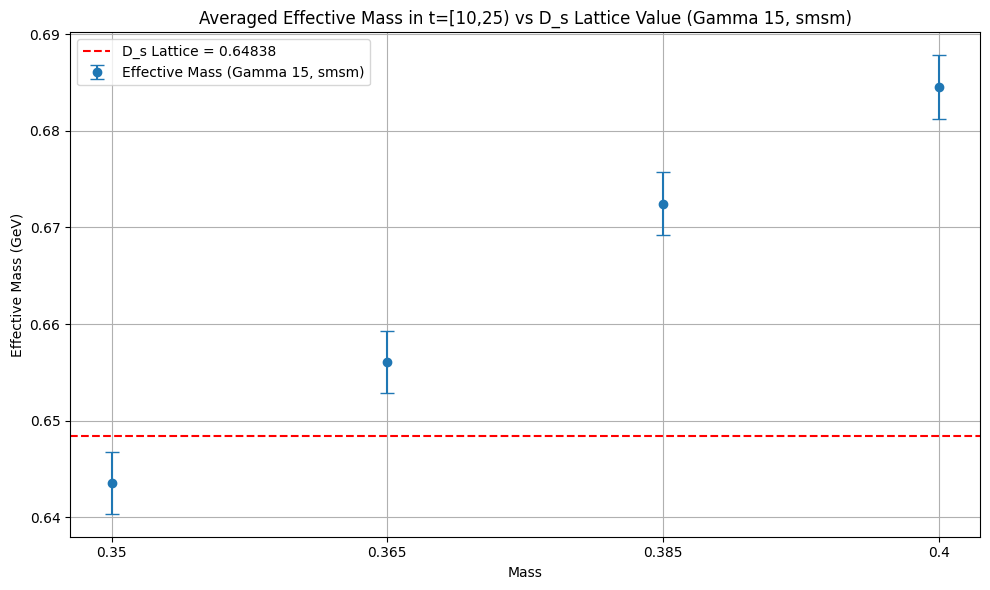

In [1]:
import h5py
import gvar as gv
import numpy as np
import matplotlib.pyplot as plt

averaged_data = {}
with h5py.File("D_s_final.h5", 'r') as f:
    ds_group = f["D_s"]
    cfg_keys = [key for key in ds_group.keys() if key.startswith("cfg_")]
    num_configs = len(cfg_keys)
    print(f"Found {num_configs} configurations")
    masses = set()
    for cfg_key in cfg_keys:
        for mass_key in ds_group[cfg_key].keys():
            if mass_key.startswith("mass_"):
                masses.add(mass_key.split("_")[1])
    masses = sorted(masses)
    print(f"Available masses: {masses}")
    for mass in masses:
        averaged_data[mass] = {"smsm": {}}
        gamma_idx = 15
        correlators = {"smsm": []}
        for cfg_key in cfg_keys:
            smear_type = "smsm"
            correlator_key = f"D_s/{cfg_key}/mass_{mass}/{smear_type}/gamma_{gamma_idx}/mom_0/correlator"
            if correlator_key in f:
                correlators[smear_type].append(f[correlator_key][:])
        if correlators["smsm"]:
            avg_correlator = gv.dataset.avg_data(correlators["smsm"])
            folded_correlator = 0.5 * (avg_correlator + avg_correlator[::-1])
            averaged_data[mass]["smsm"][gamma_idx] = folded_correlator
            print(f"Folded mass_{mass}, smsm, gamma_{gamma_idx}: {len(correlators['smsm'])} configs, sample: {folded_correlator[0]}")
        else:
            print(f"No data for mass_{mass}, smsm, gamma_{gamma_idx}")

effective_mass = {}
for mass in averaged_data:
    effective_mass[mass] = {}
    snk = "smsm"
    effective_mass[mass][snk] = {}
    gamma_idx = 15
    if gamma_idx in averaged_data[mass][snk]:
        effective_mass[mass][snk][gamma_idx] = np.log(
            averaged_data[mass][snk][gamma_idx] / np.roll(averaged_data[mass][snk][gamma_idx], -1)
        )
        print(f"Effective mass for mass_{mass}, smsm, gamma_{gamma_idx}: {effective_mass[mass][snk][gamma_idx][10]} (t=10)")

conv_factor = 0.065 / 197.3269804
ds_lattice = conv_factor * 1968.35
fit_range = slice(10, 25)
avg_eff_mass = {}
std_eff_mass = {}

for mass in effective_mass:
    gamma_idx = 15
    if "smsm" in effective_mass[mass] and gamma_idx in effective_mass[mass]["smsm"]:
        eff_mass_in_range = effective_mass[mass]["smsm"][gamma_idx][fit_range]
        avg_eff_mass[mass] = gv.mean(eff_mass_in_range) 
        std_eff_mass[mass] = gv.sdev(eff_mass_in_range)
        print('np avg',np.average( avg_eff_mass[mass]))
        print('np sdev',np.average(std_eff_mass[mass]))

        print(f"Averaged effective mass for mass_{mass}, smsm: {avg_eff_mass[mass]}")

plt.figure(figsize=(10, 6))
x_positions = np.arange(len(masses))
mass_values = np.full(len(masses), np.nan)
mass_errors = np.full(len(masses), np.nan)
for i, mass in enumerate(masses):
    if mass in avg_eff_mass:
        mass_values[i] = np.average(avg_eff_mass[mass])
        mass_errors[i] = np.average(std_eff_mass[mass])
    else:
        print(f"No averaged effective mass for mass_{mass}, smsm")
plt.errorbar(x_positions, mass_values, yerr=mass_errors, fmt='o', label="Effective Mass (Gamma 15, smsm)", capsize=5)
plt.axhline(y=ds_lattice, color='r', linestyle='--', label=f"D_s Lattice = {ds_lattice:.5f}")
plt.xticks(x_positions, masses)
plt.xlabel("Mass")
plt.ylabel("Effective Mass (GeV)")
plt.title("Averaged Effective Mass in t=[10,25) vs D_s Lattice Value (Gamma 15, smsm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Using masses: ['0.35', '0.365', '0.385', '0.4']


/tmp/ipykernel_236986/1435394654.py:24: ComplexWarning: Casting complex values to real discards the imaginary part
  avg_correlator = gv.dataset.avg_data(correlators["smsm"])


Averaged effective mass for mass_0.35, smsm: [1990.73892287 1965.24237233 1966.90769065 1967.88411916 1958.86370181
 1954.83766486 1944.78045021 1950.59023938 1953.26412721 1953.1154985
 1940.83849549 1941.77317736 1949.70709219 1927.39051372 1938.38984727]
Averaged effective mass for mass_0.365, smsm: [2029.63197645 2003.79807185 2005.39108    2006.12442881 1997.01895836
 1993.05056358 1982.78697759 1988.42864146 1990.99063241 1990.84682554
 1978.54352881 1979.62262204 1987.75790807 1964.88850057 1975.92177602]
Averaged effective mass for mass_0.385, smsm: [2080.49017389 2054.23463134 2055.73141986 2056.14203925 2046.94094727
 2043.05737427 2032.52453985 2037.9612502  2040.37114608 2040.21946262
 2027.88696287 2029.15919425 2037.55054031 2013.98631697 2025.04315237]
Averaged effective mass for mass_0.4, smsm: [2117.92052278 2091.36866071 2092.79335529 2092.96327933 2083.70315706
 2079.88812781 2069.15770812 2074.45447911 2076.74822538 2076.58150018
 2064.23156923 2065.64786156 2074.22

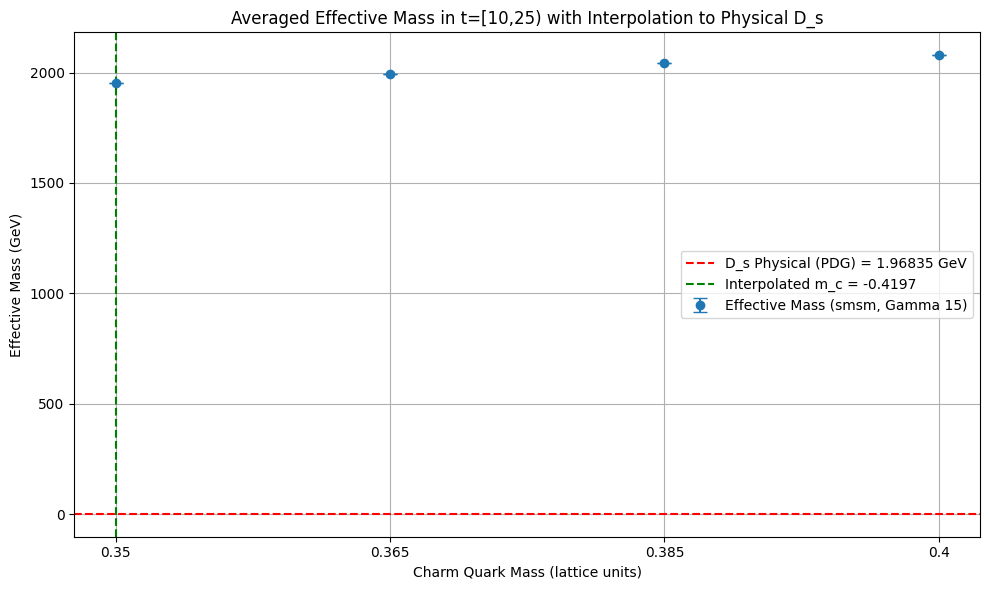

In [8]:
import h5py
import gvar as gv
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Load and process data
averaged_data = {}
with h5py.File("D_s_final.h5", 'r') as f:
    ds_group = f["D_s"]
    cfg_keys = [key for key in ds_group.keys() if key.startswith("cfg_")]
    masses = sorted(['0.35', '0.365', '0.385', '0.4'])
    print(f"Using masses: {masses}")
    for mass in masses:
        averaged_data[mass] = {"smsm": {}}
        gamma_idx = 15
        correlators = {"smsm": []}
        for cfg_key in cfg_keys:
            smear_type = "smsm"
            correlator_key = f"D_s/{cfg_key}/mass_{mass}/{smear_type}/gamma_{gamma_idx}/mom_0/correlator"
            if correlator_key in f:
                correlators[smear_type].append(f[correlator_key][:])
        if correlators["smsm"]:
            avg_correlator = gv.dataset.avg_data(correlators["smsm"])
            folded_correlator = 0.5 * (avg_correlator + avg_correlator[::-1])
            averaged_data[mass]["smsm"][gamma_idx] = folded_correlator
        else:
            print(f"No smsm data for mass_{mass}")

effective_mass = {}
for mass in averaged_data:
    effective_mass[mass] = {"smsm": {}}
    gamma_idx = 15
    if gamma_idx in averaged_data[mass]["smsm"]:
        effective_mass[mass]["smsm"][gamma_idx] = np.log(
            averaged_data[mass]["smsm"][gamma_idx] / np.roll(averaged_data[mass]["smsm"][gamma_idx], -1)
        )
    else:
        print(f"No folded correlator data for mass_{mass}")

# Correct conversion factor: inverse lattice spacing
a_inv = 197.3269804 / 0.065  # ~3.0358 GeV
ds_lattice = 1968.35 / 1000  # Convert PDG value to GeV (1.96835 GeV)
fit_range = slice(10, 25)
avg_eff_mass = {}
for mass in effective_mass:
    gamma_idx = 15
    if "smsm" in effective_mass[mass] and gamma_idx in effective_mass[mass]["smsm"]:
        eff_mass_in_range = effective_mass[mass]["smsm"][gamma_idx][fit_range]
        if len(eff_mass_in_range) > 0:
            avg_eff_mass[mass] = gv.mean(eff_mass_in_range) * a_inv  # Convert to GeV
            print(f"Averaged effective mass for mass_{mass}, smsm: {avg_eff_mass[mass]}")
        else:
            print(f"Empty effective mass range for mass_{mass}")
    else:
        print(f"No effective mass data for mass_{mass}")

# Extract data for interpolation
mass_values = np.array([float(m) for m in masses])  # Lattice charm quark masses
eff_masses = []
eff_errors = []
for m in masses:
    if m in avg_eff_mass:
        eff_masses.append(np.average(gv.mean(avg_eff_mass[m])))
        eff_errors.append(np.average(gv.sdev(avg_eff_mass[m])))
    else:
        eff_masses.append(np.nan)
        eff_errors.append(np.nan)
        print(f"No avg_eff_mass for mass_{m}")
eff_masses = np.array(eff_masses)
eff_errors = np.array(eff_errors)

# Physical D_s mass (PDG value)
m_ds_physical = 1.96835  # GeV

# Interpolation (only use finite values)
mask = np.isfinite(eff_masses)
if np.sum(mask) >= 2:
    interp_func = interp1d(eff_masses[mask], mass_values[mask], kind='linear', bounds_error=False, fill_value="extrapolate")
    m_c_physical = interp_func(m_ds_physical)
    print(f"Interpolated charm quark mass at physical D_s point: {m_c_physical:.4f} (lattice units)")
else:
    print("Not enough valid data points for interpolation")

# Plotting
plt.figure(figsize=(10, 6))
x_positions = np.arange(4)
plt.errorbar(x_positions, eff_masses, yerr=eff_errors, fmt='o', label="Effective Mass (smsm, Gamma 15)", capsize=5)
plt.axhline(y=m_ds_physical, color='r', linestyle='--', label=f"D_s Physical (PDG) = {m_ds_physical:.5f} GeV")
if np.sum(mask) >= 2:
    plt.axvline(x=np.interp(m_ds_physical, eff_masses[mask], x_positions[mask]), color='g', linestyle='--',
                label=f"Interpolated m_c = {m_c_physical:.4f}")
plt.xticks(x_positions, masses)
plt.xlabel("Charm Quark Mass (lattice units)")
plt.ylabel("Effective Mass (GeV)")
plt.title("Averaged Effective Mass in t=[10,25) with Interpolation to Physical D_s")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import h5py
import gvar as gv
import numpy as np
import matplotlib.pyplot as plt

averaged_data = {}
with h5py.File("D_s.h5", 'r') as f:
    ds_group = f["D_s"]
    cfg_keys = [key for key in ds_group.keys() if key.startswith("cfg_")]
    num_configs = len(cfg_keys)
    print(f"Found {num_configs} configurations")
    masses = set()
    for cfg_key in cfg_keys:
        for mass_key in ds_group[cfg_key].keys():
            if mass_key.startswith("mass_"):
                masses.add(mass_key.split("_")[1])
    masses = sorted(masses)
    print(f"Available masses: {masses}")
    for mass in masses:
        averaged_data[mass] = {"smpt": {}, "smsm": {}}
        for gamma_idx in range(16):
            correlators = {"smpt": [], "smsm": []}
            for cfg_key in cfg_keys:
                for smear_type in ["smpt", "smsm"]:
                    correlator_key = f"D_s/{cfg_key}/mass_{mass}/{smear_type}/gamma_{gamma_idx}/mom_0/correlator"
                    if correlator_key in f:
                        correlators[smear_type].append(f[correlator_key][:])
            for smear_type in ["smpt", "smsm"]:
                if correlators[smear_type]:
                    avg_correlator = gv.dataset.avg_data(correlators[smear_type])
                    folded_correlator = 0.5 * (avg_correlator + avg_correlator[::-1])
                    averaged_data[mass][smear_type][gamma_idx] = folded_correlator
                    print(f"Folded mass_{mass}, {smear_type}, gamma_{gamma_idx}: {len(correlators[smear_type])} configs, sample: {folded_correlator[0]}")
                else:
                    print(f"No data for mass_{mass}, {smear_type}, gamma_{gamma_idx}")

effective_mass = {}
for mass in averaged_data:
    effective_mass[mass] = {}
    for snk in averaged_data[mass]:
        effective_mass[mass][snk] = {}
        for gamma_idx in averaged_data[mass][snk]:
            effective_mass[mass][snk][gamma_idx] = np.log(
                averaged_data[mass][snk][gamma_idx] / np.roll(averaged_data[mass][snk][gamma_idx], -1)
            )

for mass in effective_mass:
    # for gamma_idx in range(16):
    plt.figure(figsize=(10, 6))
    t = np.arange(len(effective_mass[mass]["smpt"].get(15, [0])))
    for snk in ["smpt", "smsm"]:
        if gamma_idx in effective_mass[mass][snk]:
            eff_mass = effective_mass[mass][snk][15]
            plt.errorbar(t, gv.mean(eff_mass), yerr=gv.sdev(eff_mass), label=f"{snk}", capsize=3)
    plt.title(f"Effective Mass - Mass {mass}, Gamma {15}")
    plt.xlabel("t")
    plt.xlim(0,40)
    plt.ylim(0.6,0.66)
    plt.ylabel("Effective Mass")
    plt.legend()
    ax = plt.subplot()
    ax.axhline(0.6483794042793755, linestyle='--')
    plt.grid(True)
    plt.show()

: 

Found 50 configurations
Available masses: ['0.15', '0.25', '0.3', '0.35']


/tmp/ipykernel_170429/2159326663.py:30: ComplexWarning: Casting complex values to real discards the imaginary part
  avg_correlator = gv.dataset.avg_data(correlators[smear_type])


Folded mass_0.15, smpt, gamma_0: 50 configs, sample: 0.02911(21)
Folded mass_0.15, smsm, gamma_0: 50 configs, sample: 0.003000(68)
Folded mass_0.15, smpt, gamma_1: 50 configs, sample: 0.03484(27)
Folded mass_0.15, smsm, gamma_1: 50 configs, sample: 0.003579(71)
Folded mass_0.15, smpt, gamma_2: 50 configs, sample: 0.03484(27)
Folded mass_0.15, smsm, gamma_2: 50 configs, sample: 0.003582(71)
Folded mass_0.15, smpt, gamma_3: 50 configs, sample: -0.03340(25)
Folded mass_0.15, smsm, gamma_3: 50 configs, sample: -0.003437(70)
Folded mass_0.15, smpt, gamma_4: 50 configs, sample: 0.03482(27)
Folded mass_0.15, smsm, gamma_4: 50 configs, sample: 0.003582(71)
Folded mass_0.15, smpt, gamma_5: 50 configs, sample: -0.03342(25)
Folded mass_0.15, smsm, gamma_5: 50 configs, sample: -0.003437(70)
Folded mass_0.15, smpt, gamma_6: 50 configs, sample: -0.03341(25)
Folded mass_0.15, smsm, gamma_6: 50 configs, sample: -0.003434(70)
Folded mass_0.15, smpt, gamma_7: 50 configs, sample: -0.03071(23)
Folded mass

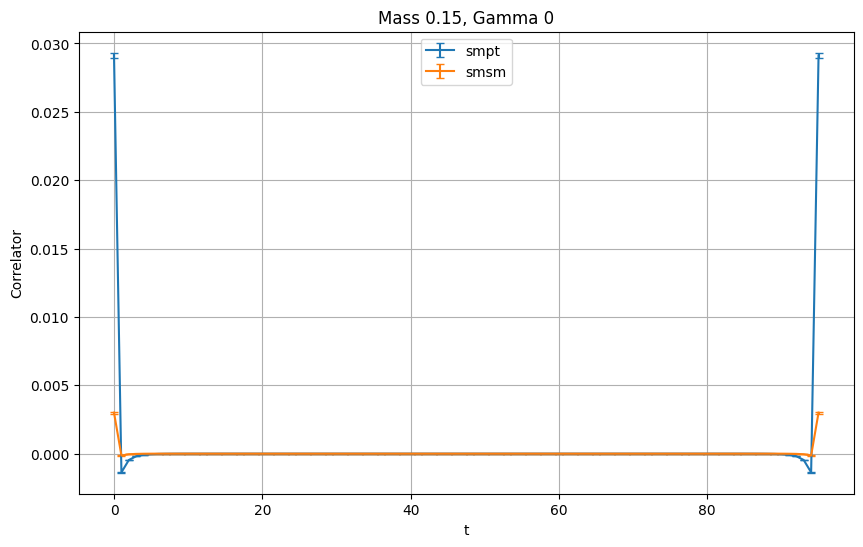

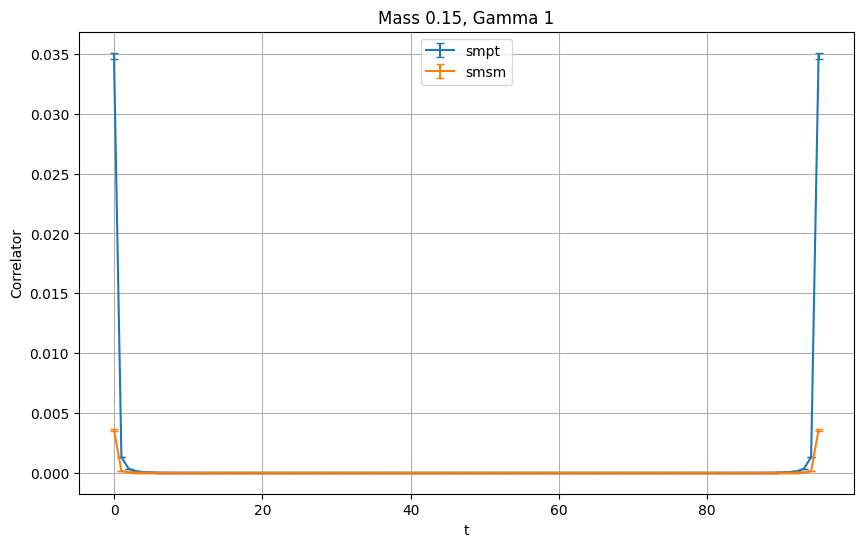

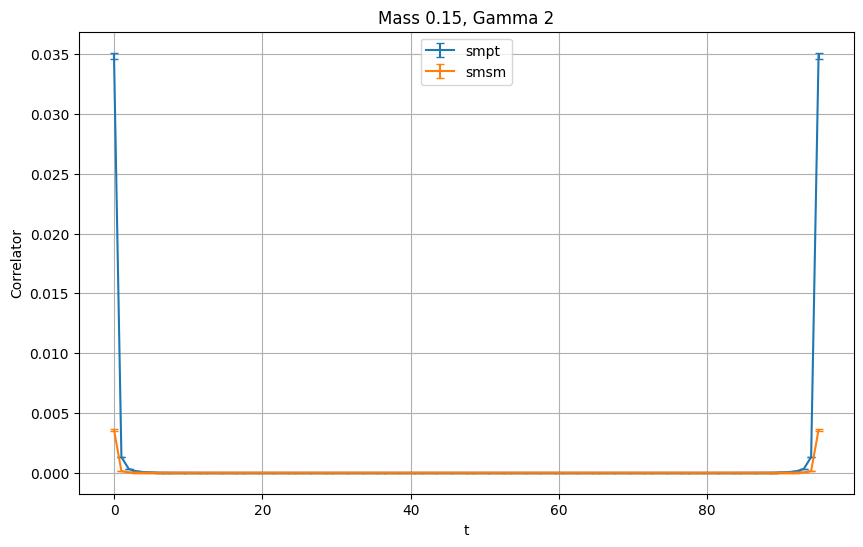

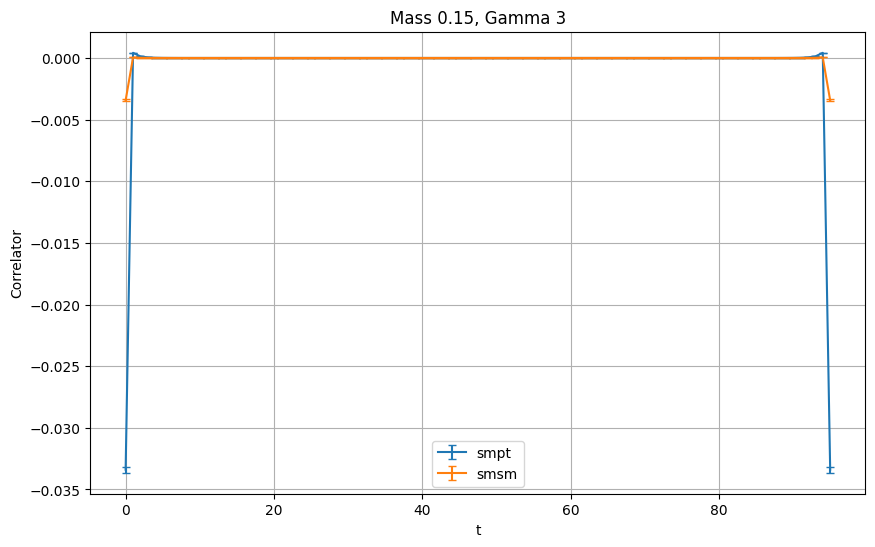

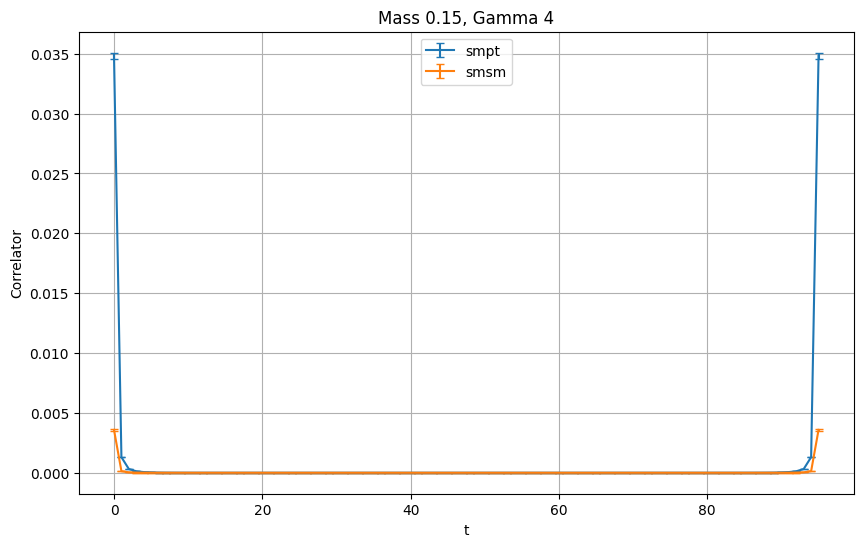

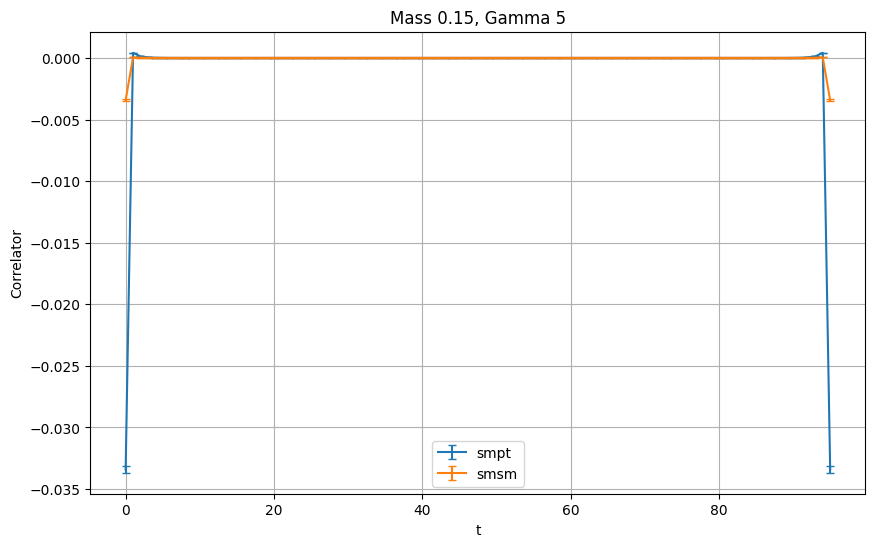

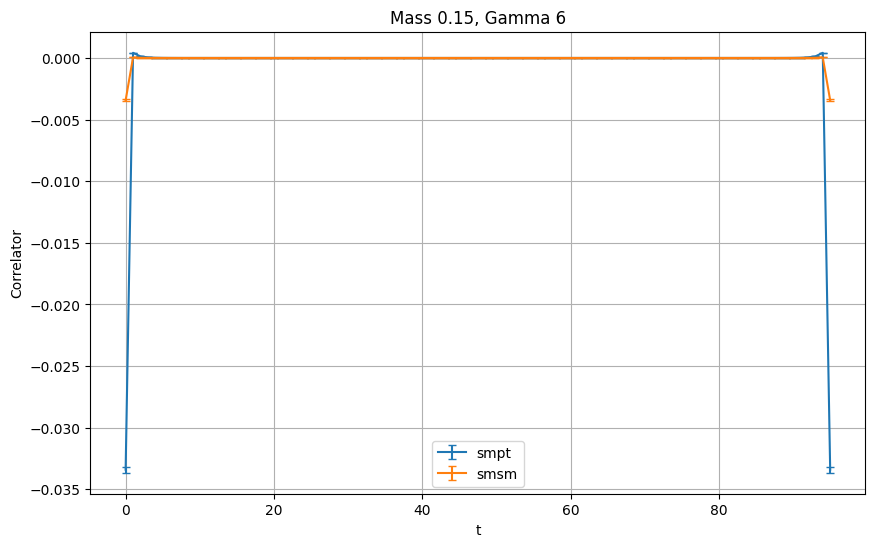

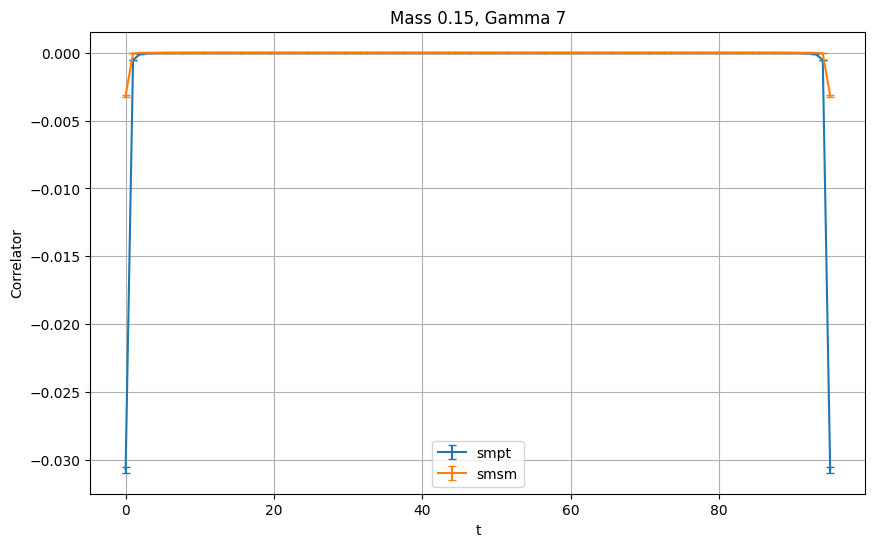

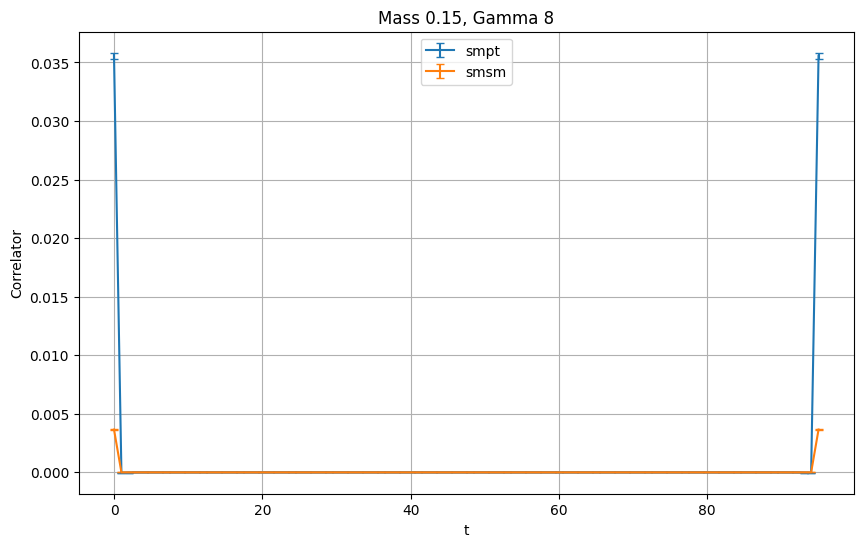

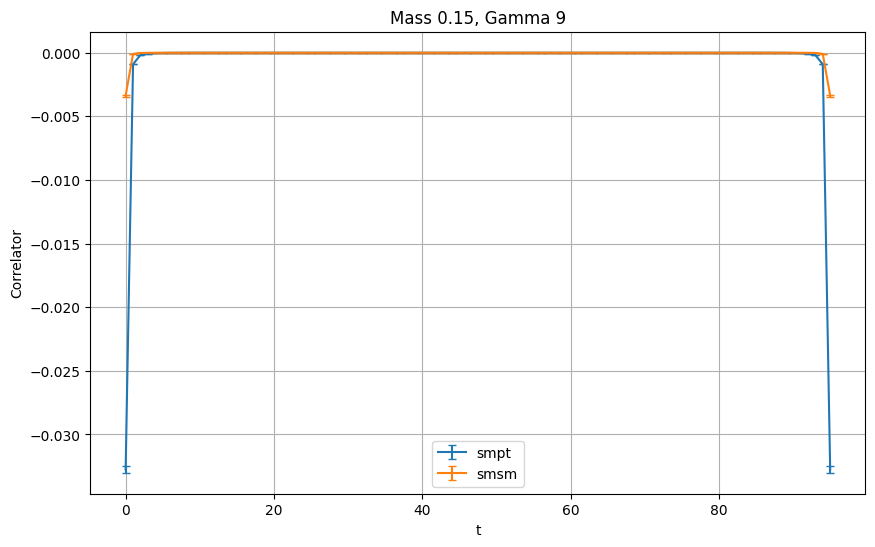

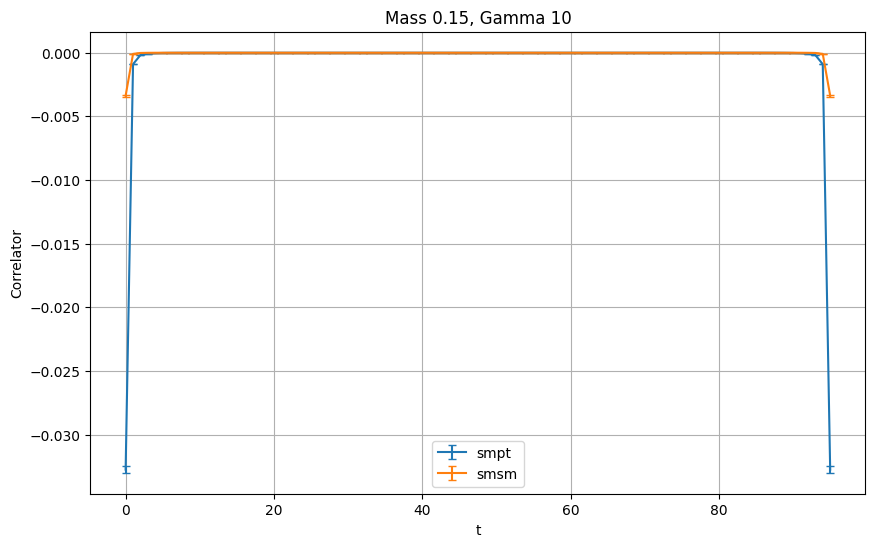

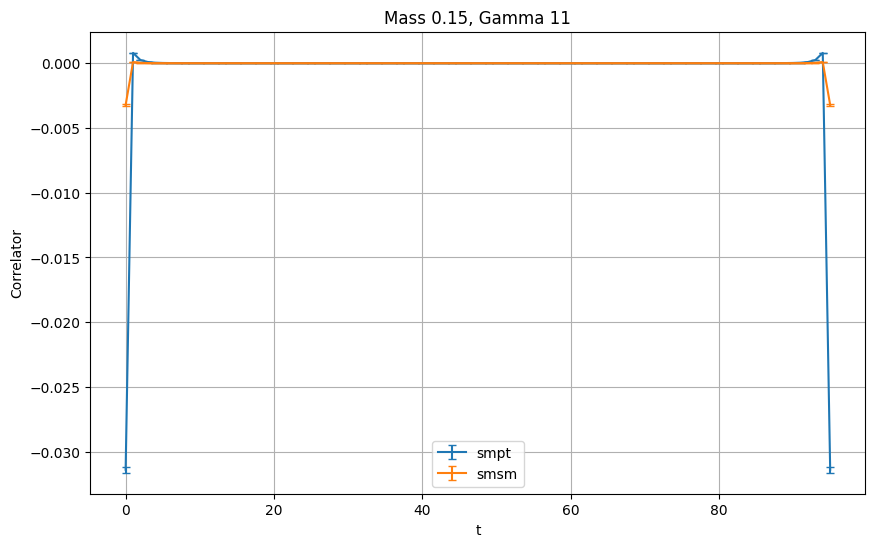

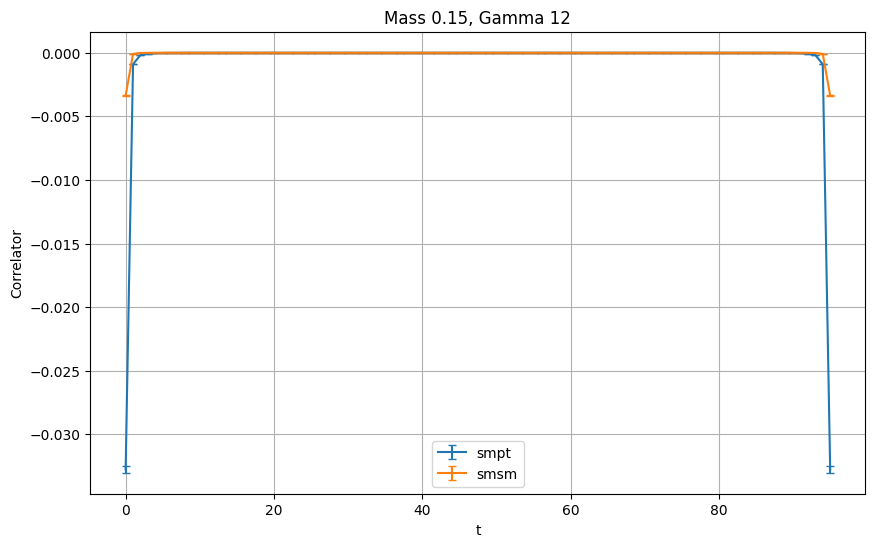

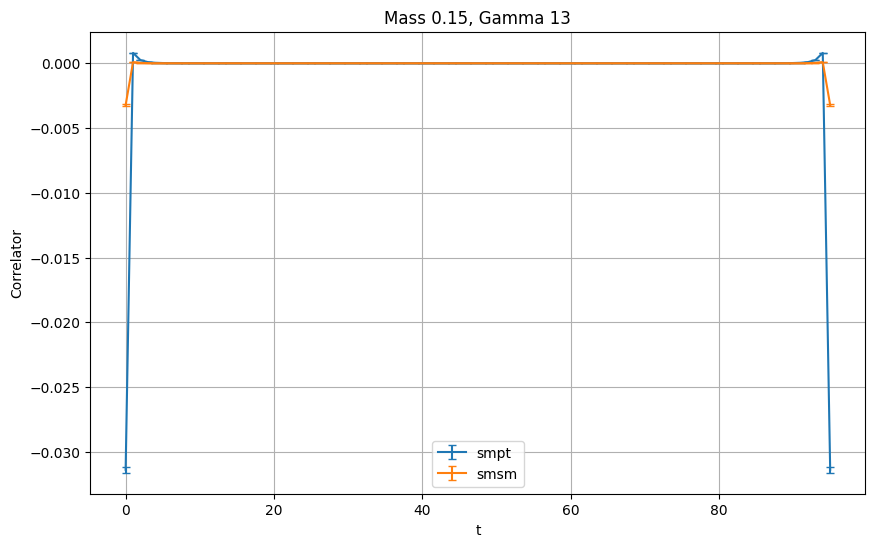

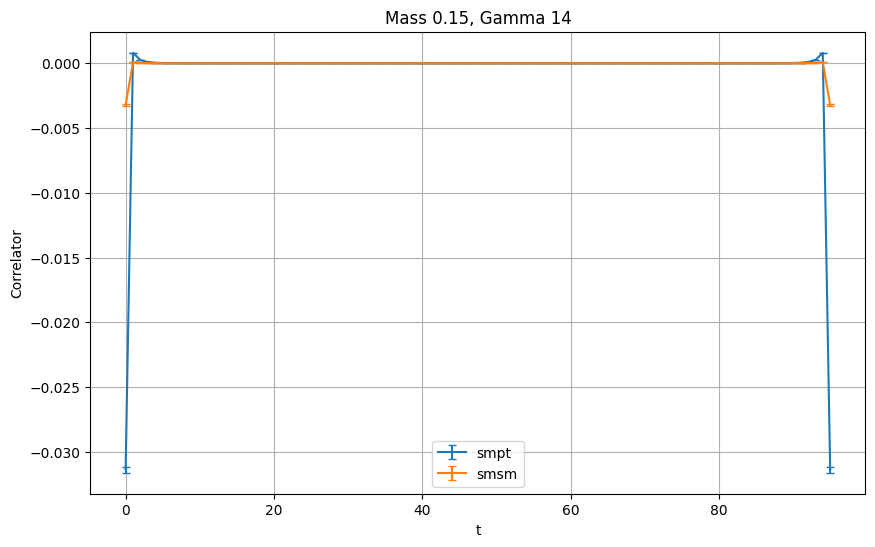

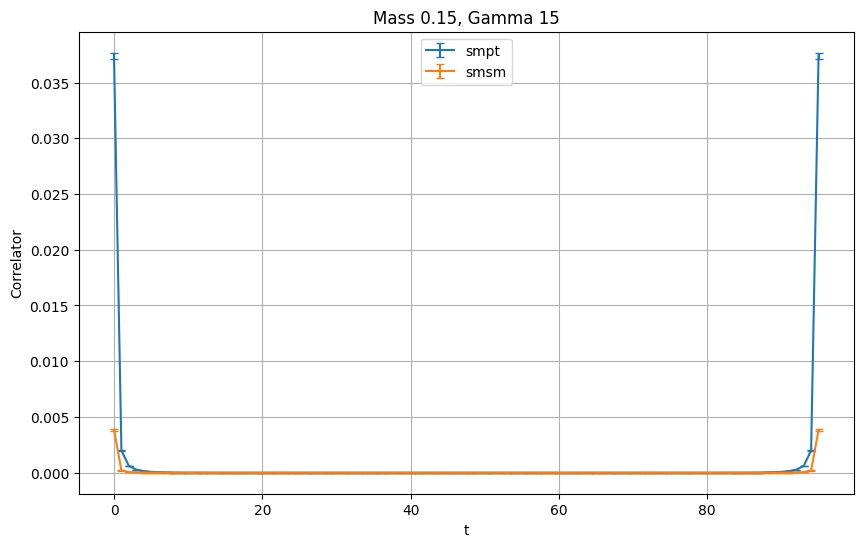

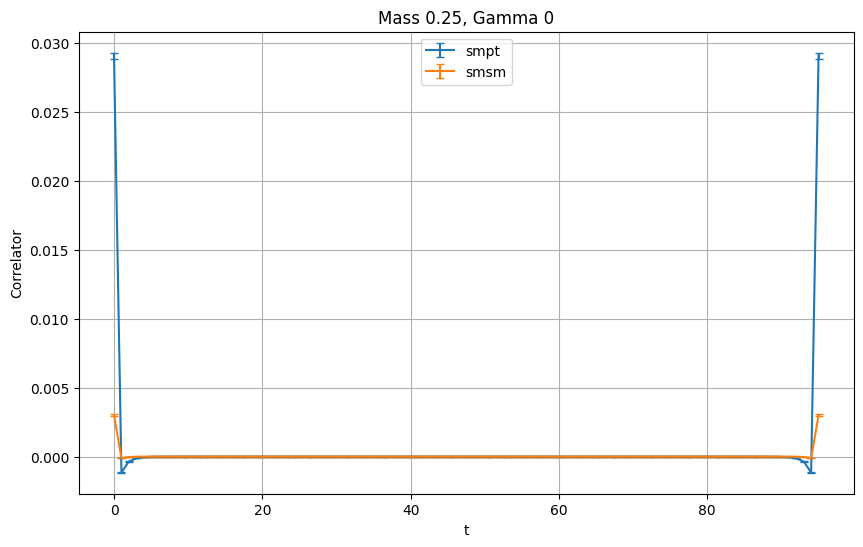

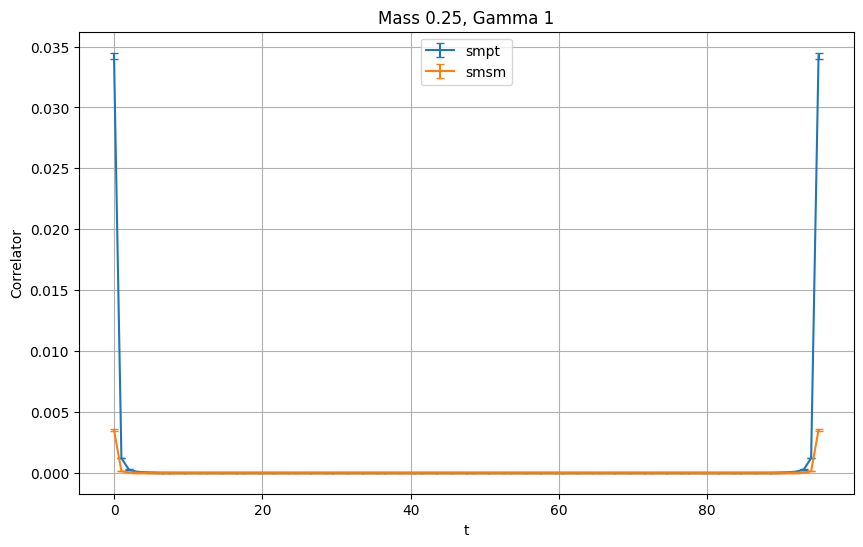

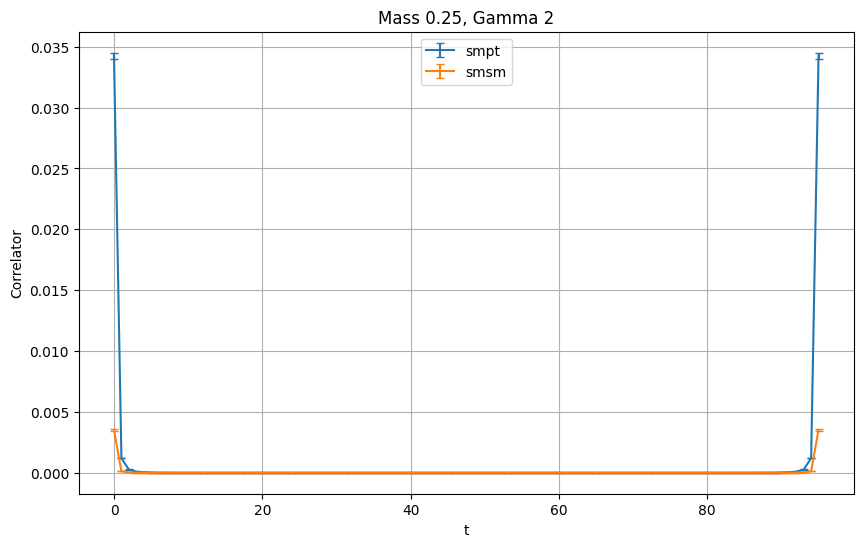

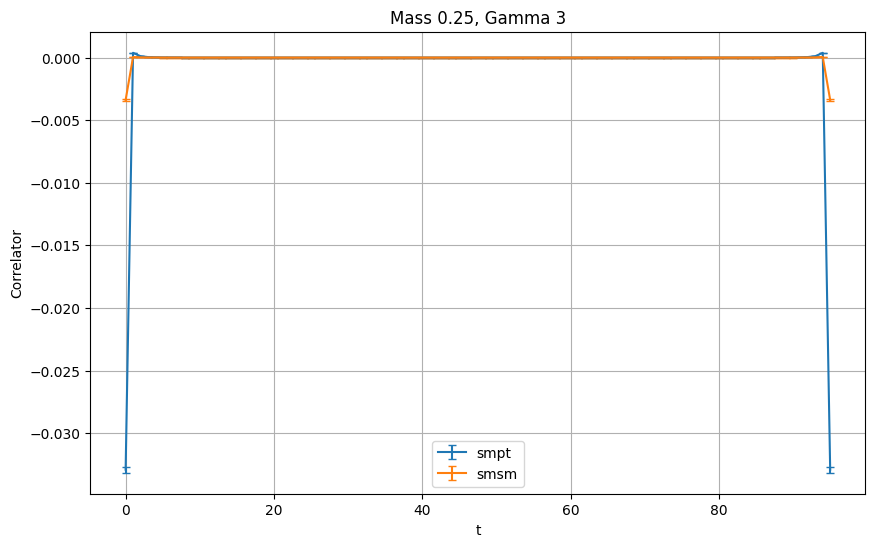

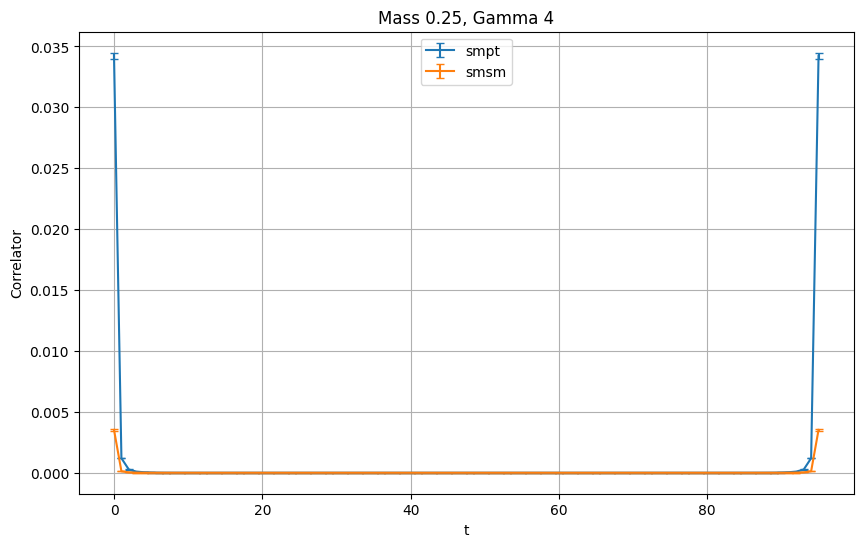

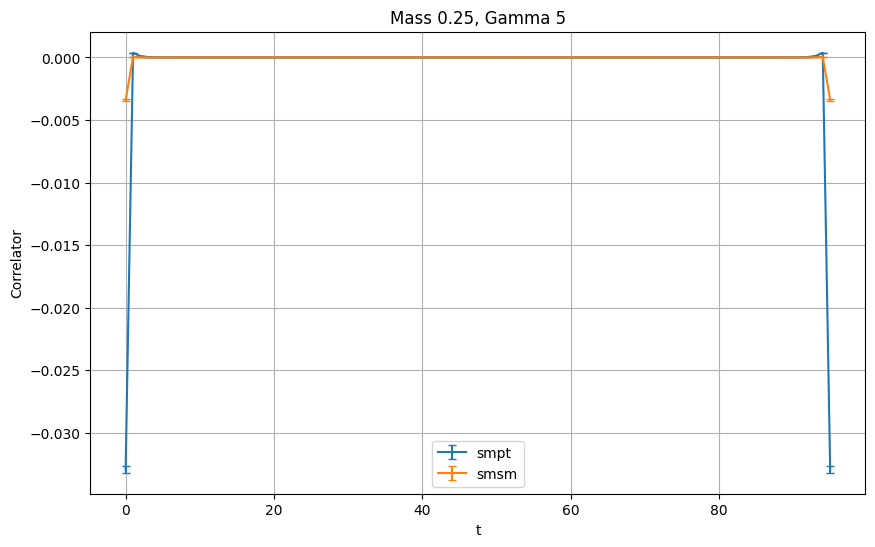

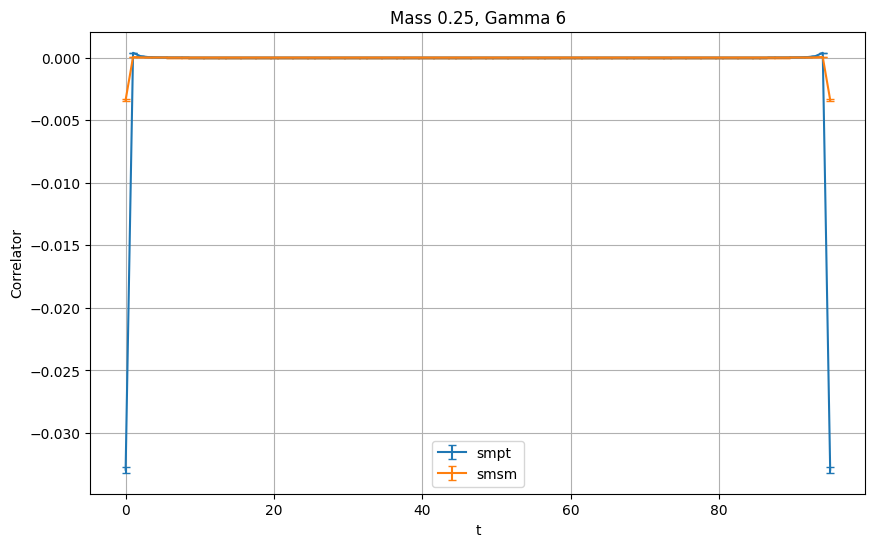

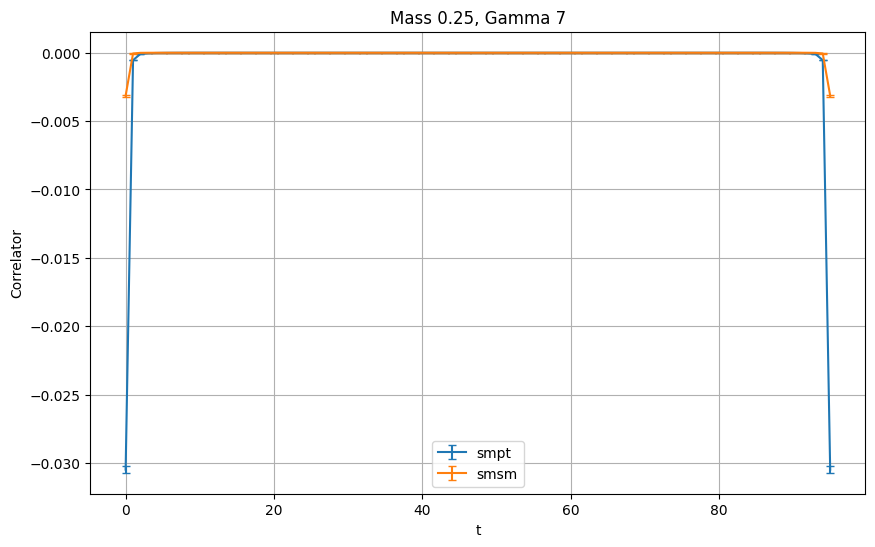

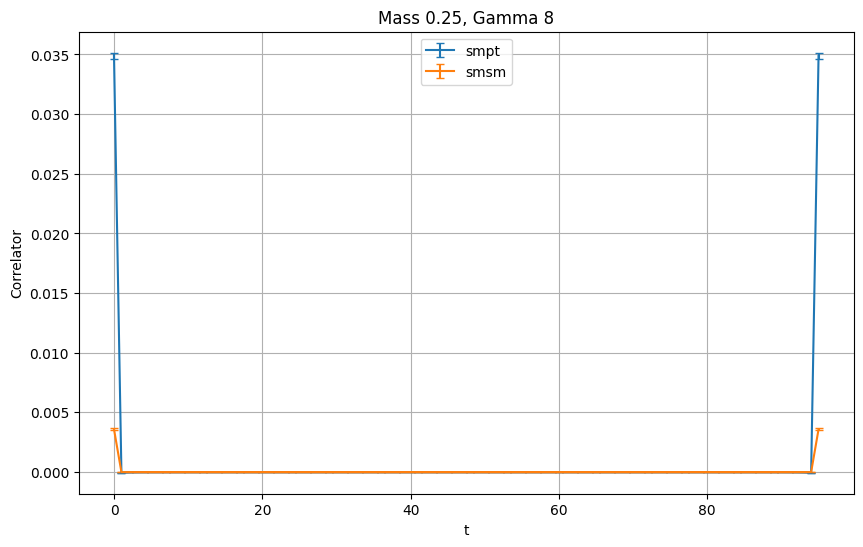

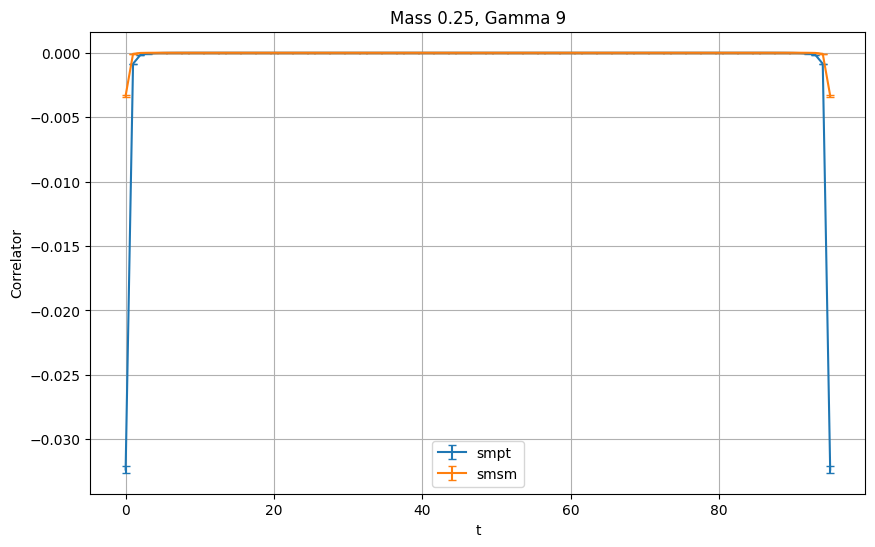

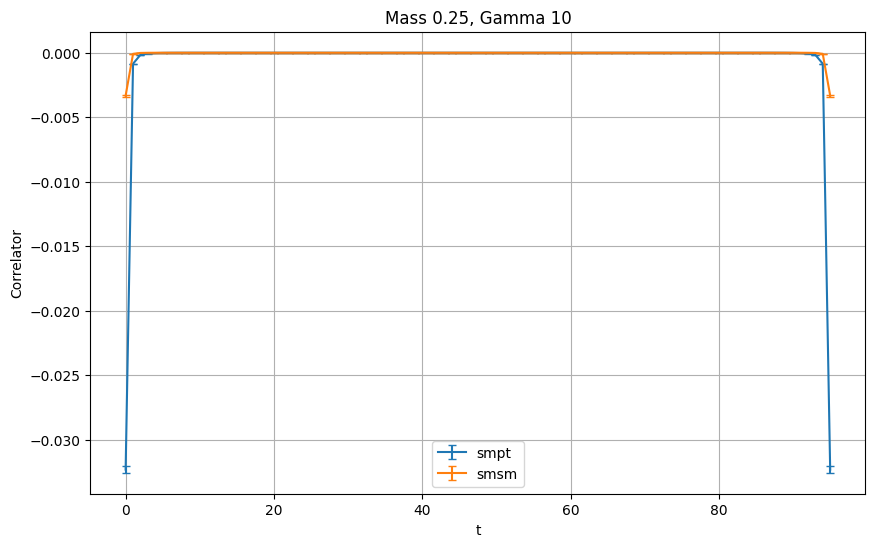

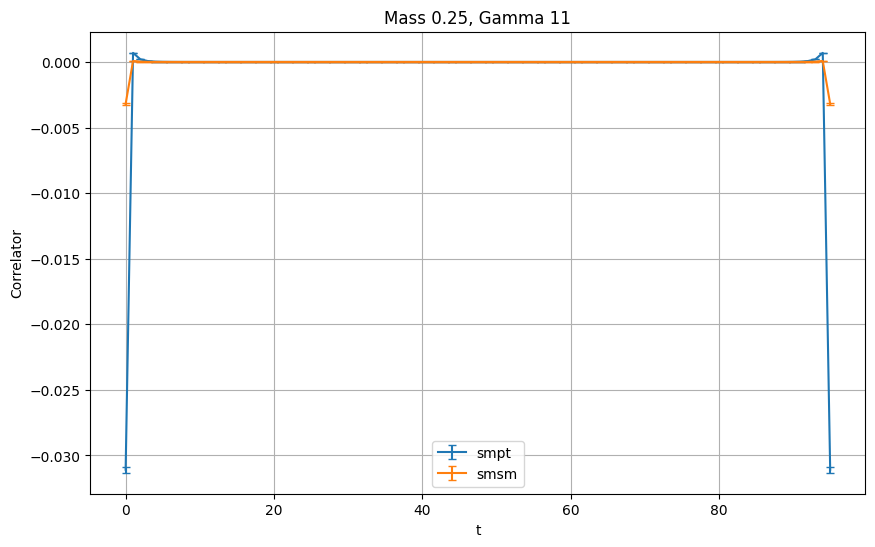

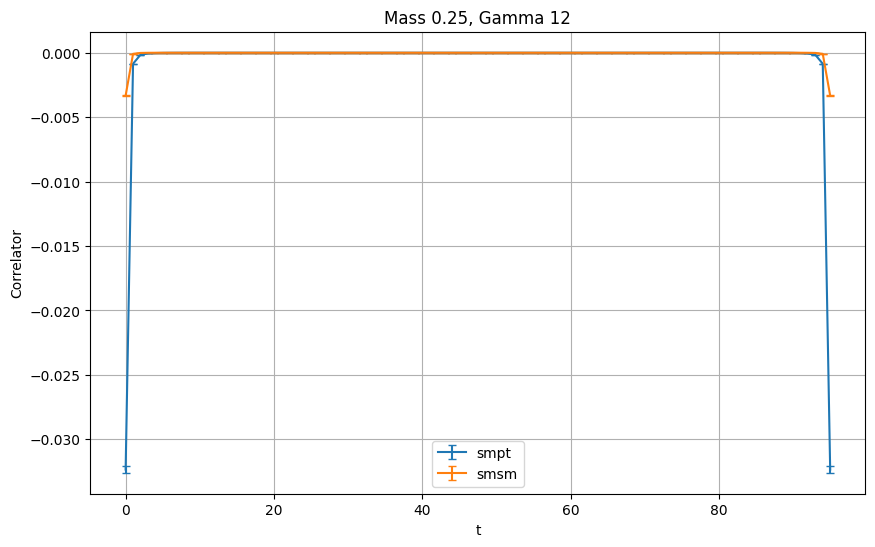

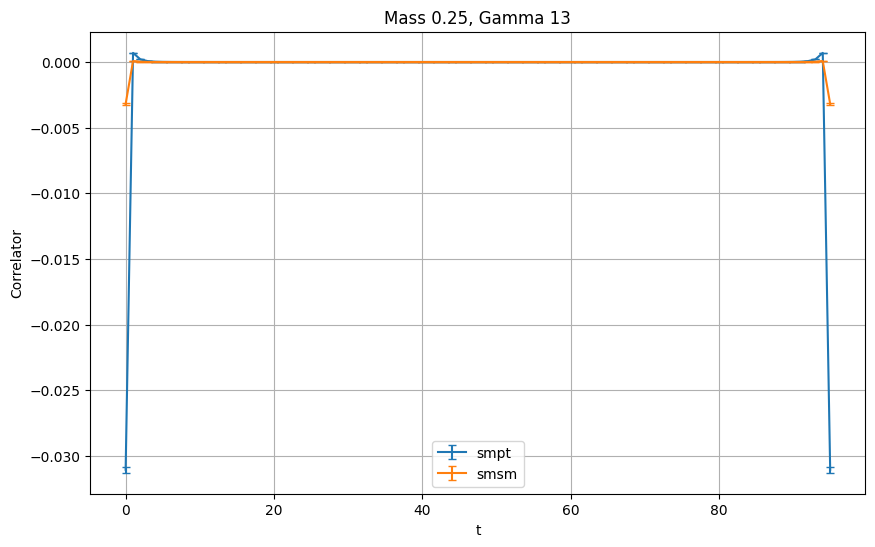

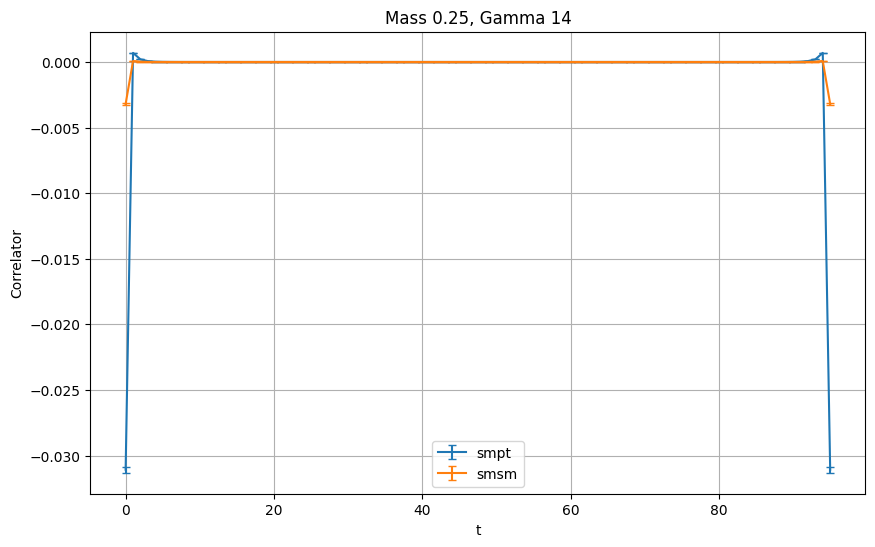

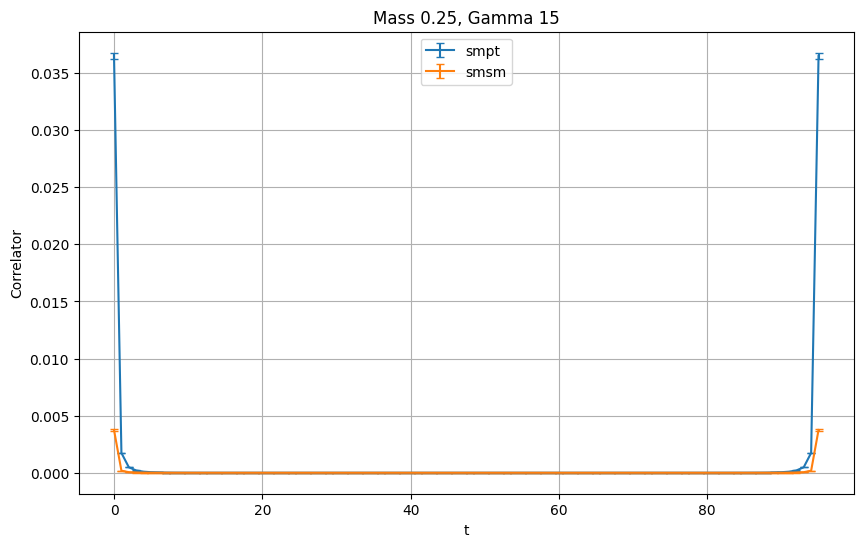

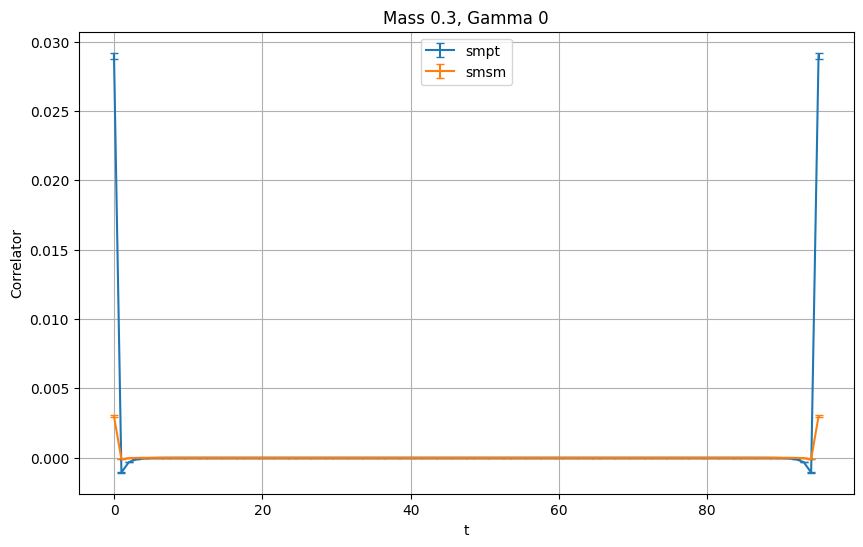

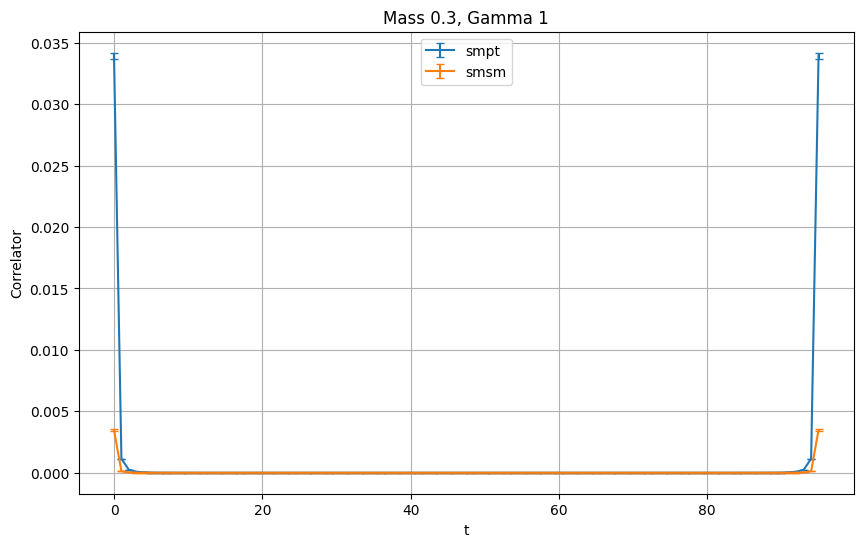

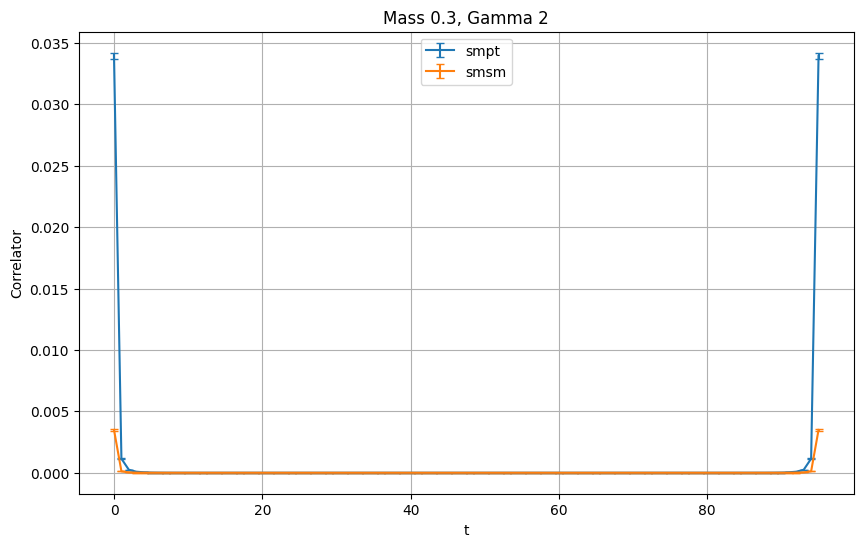

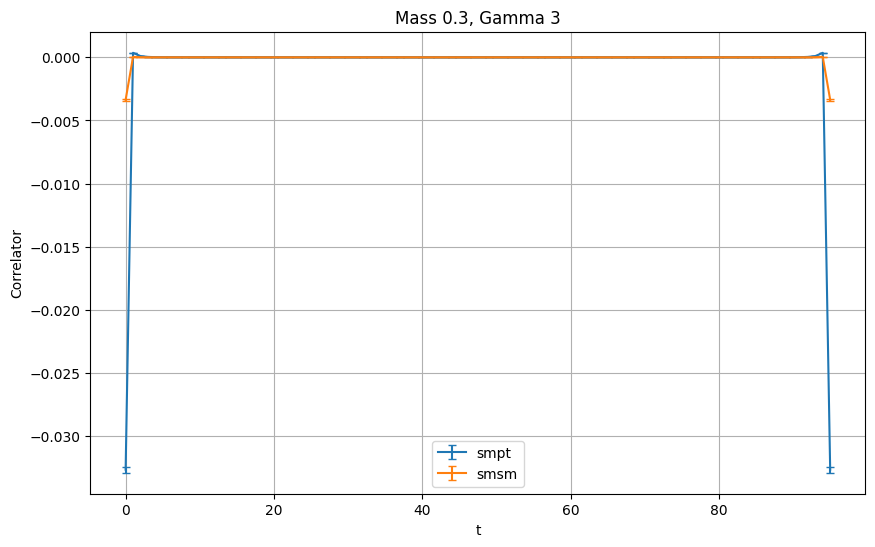

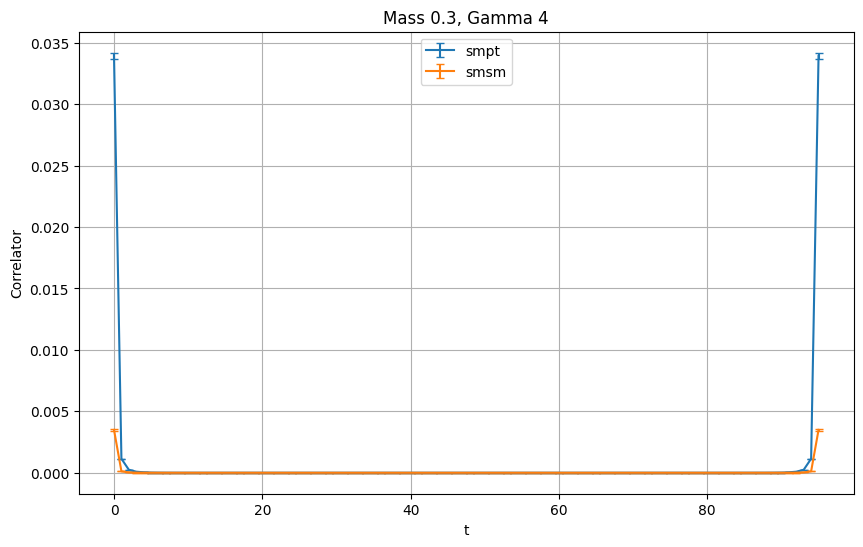

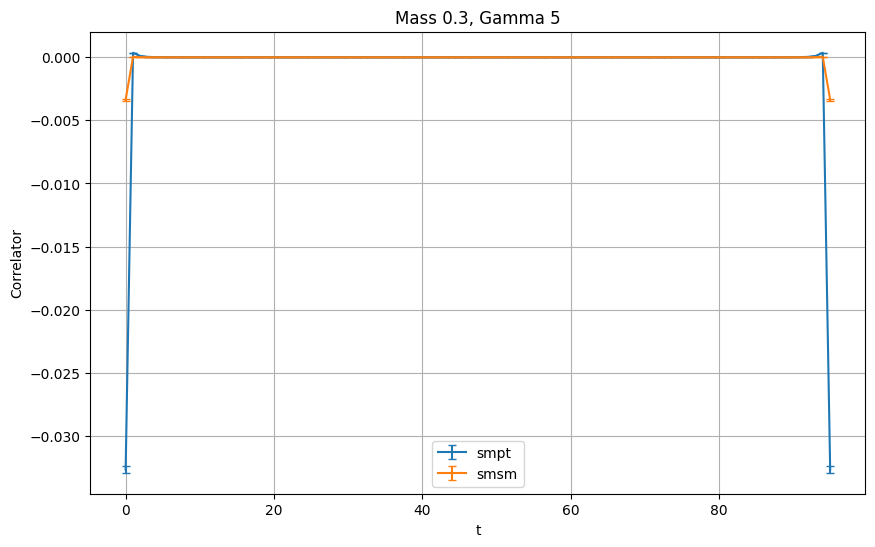

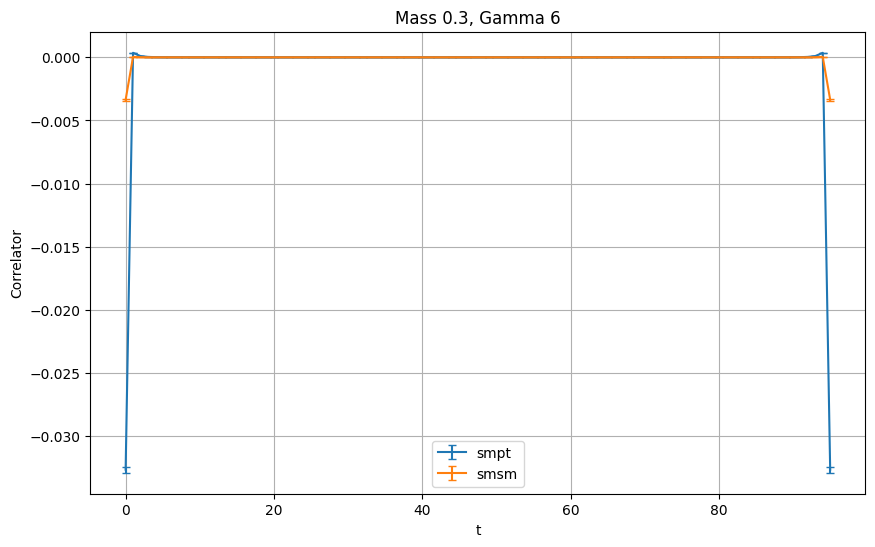

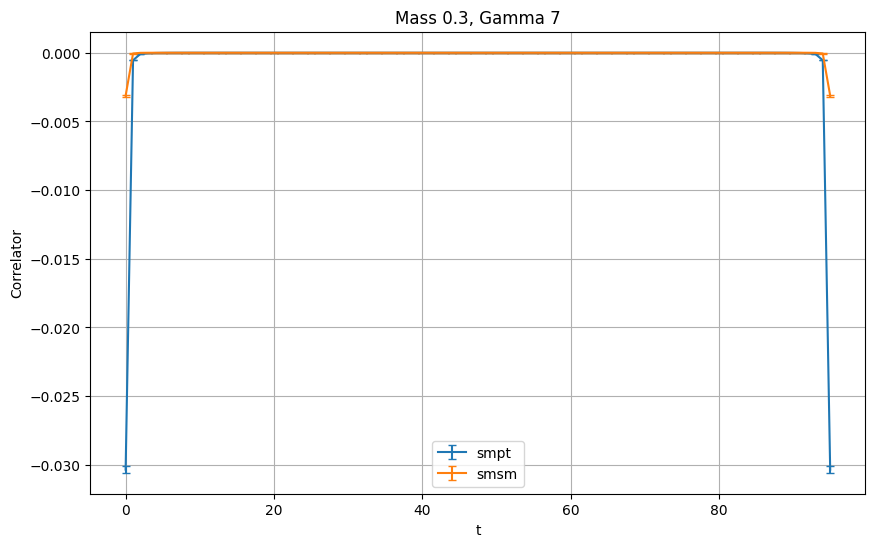

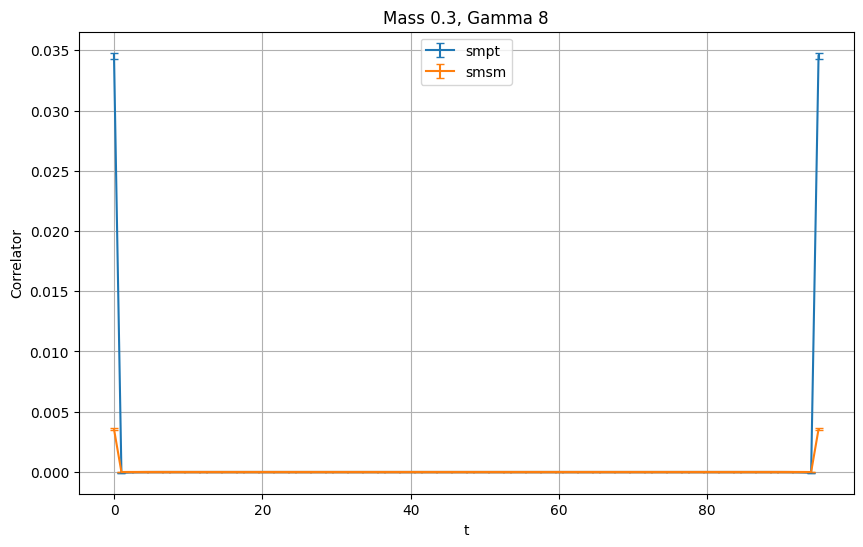

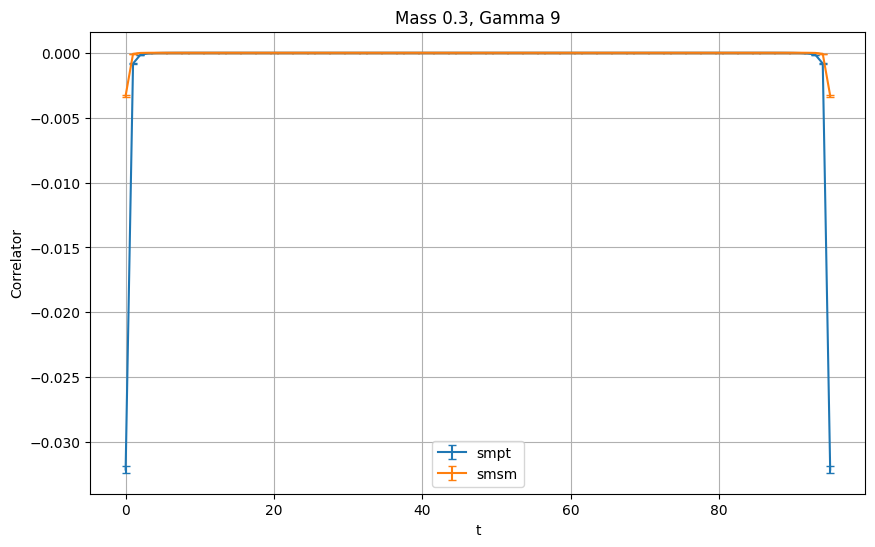

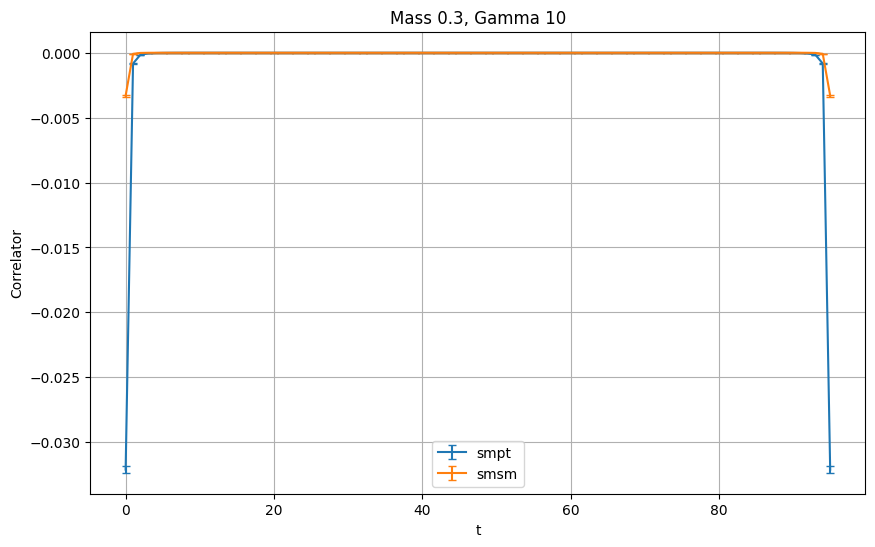

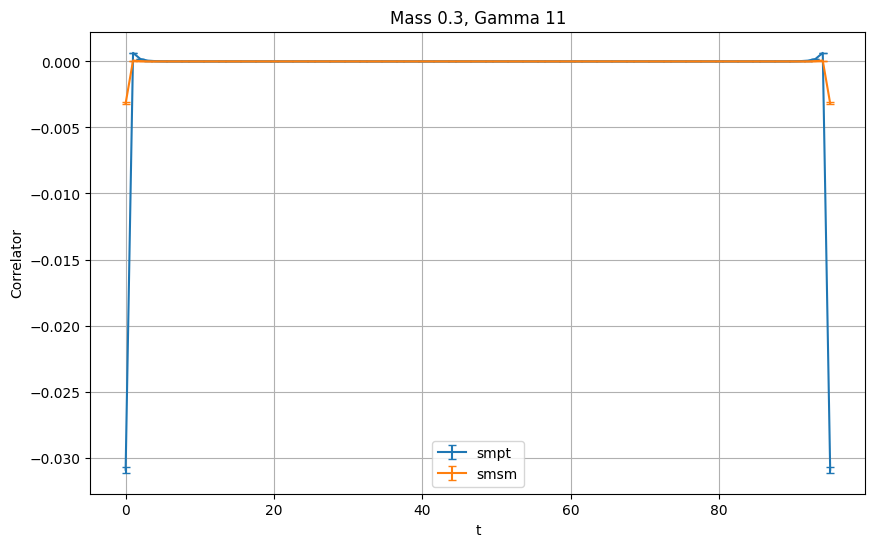

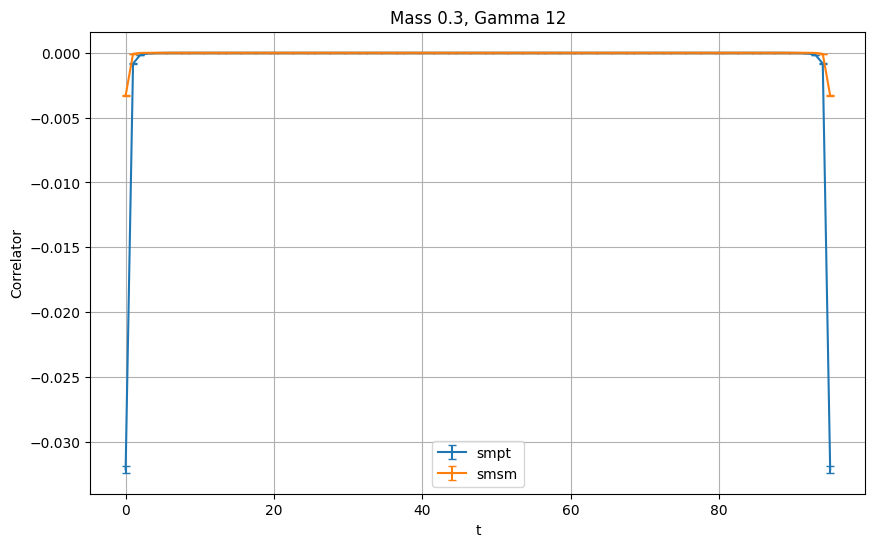

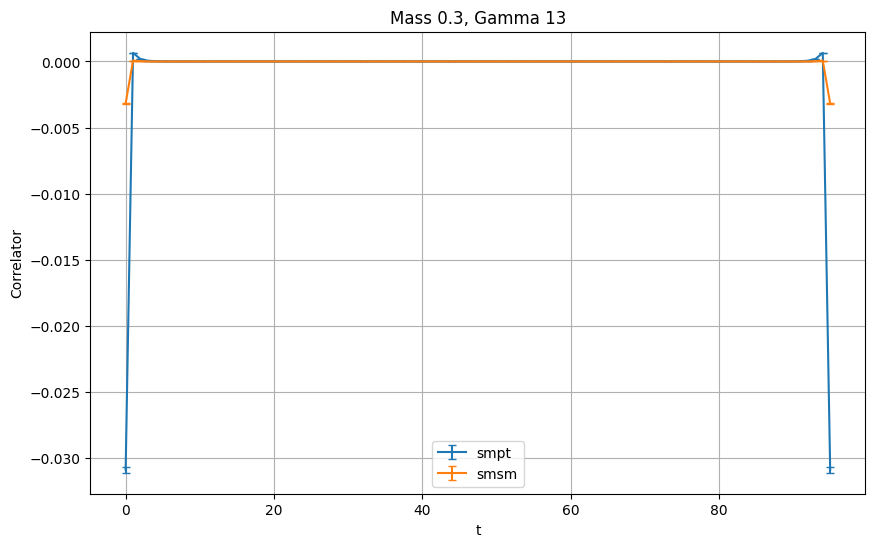

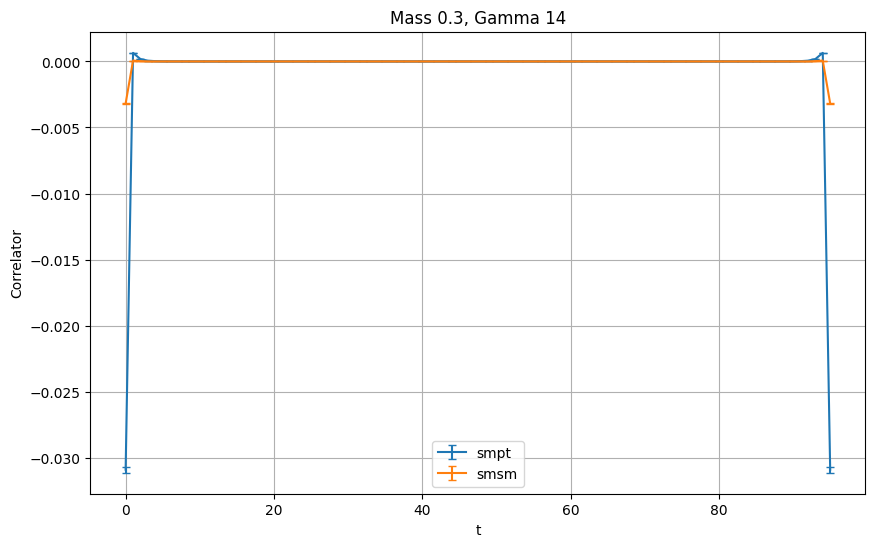

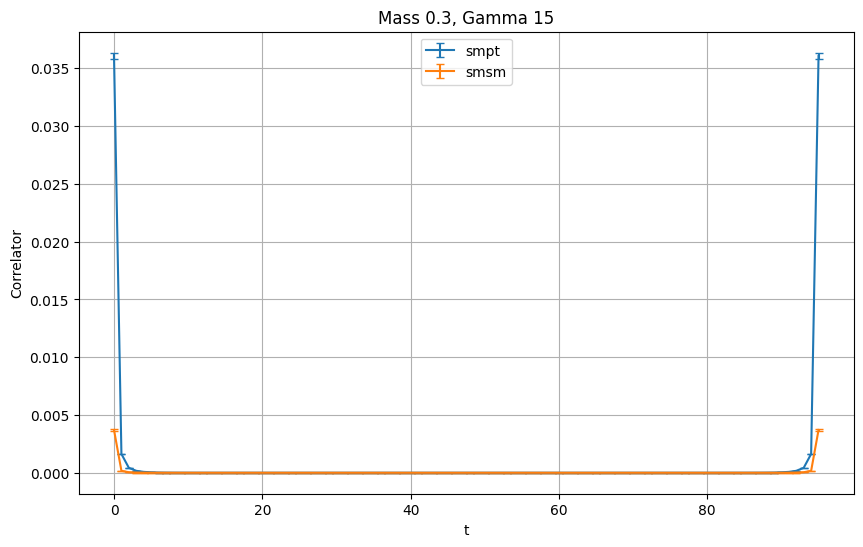

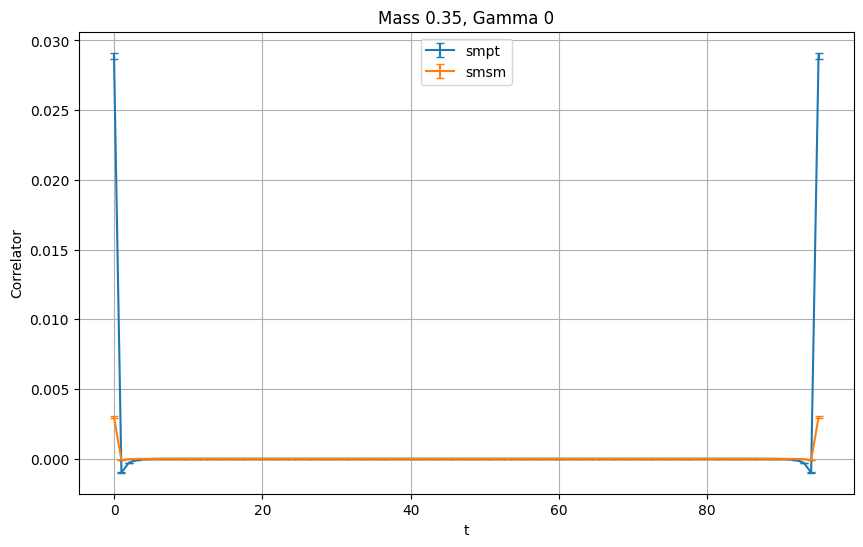

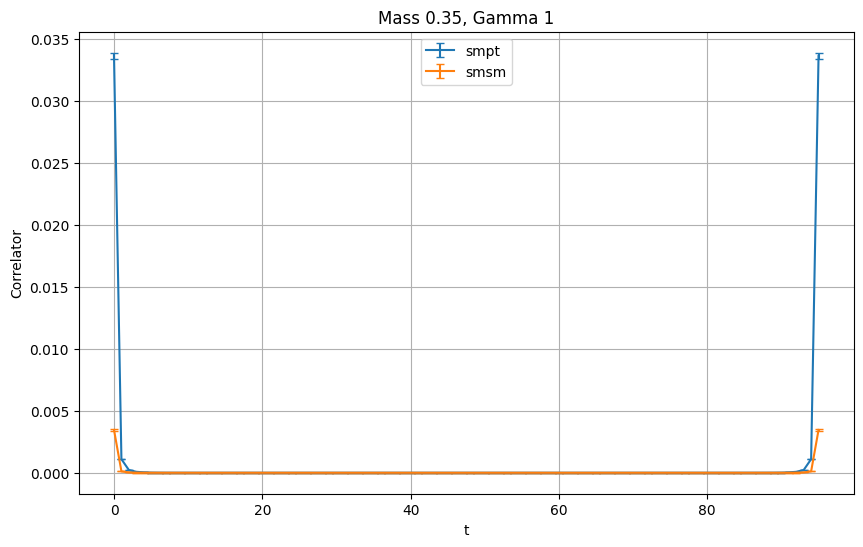

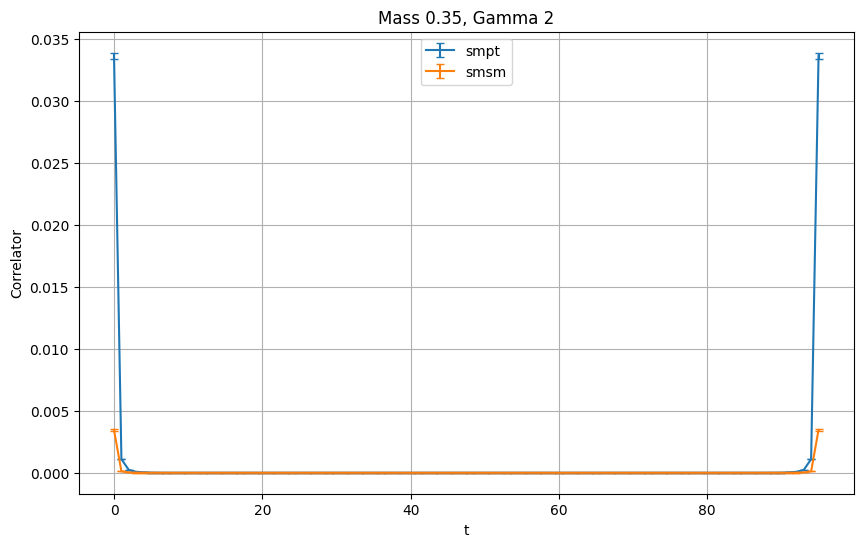

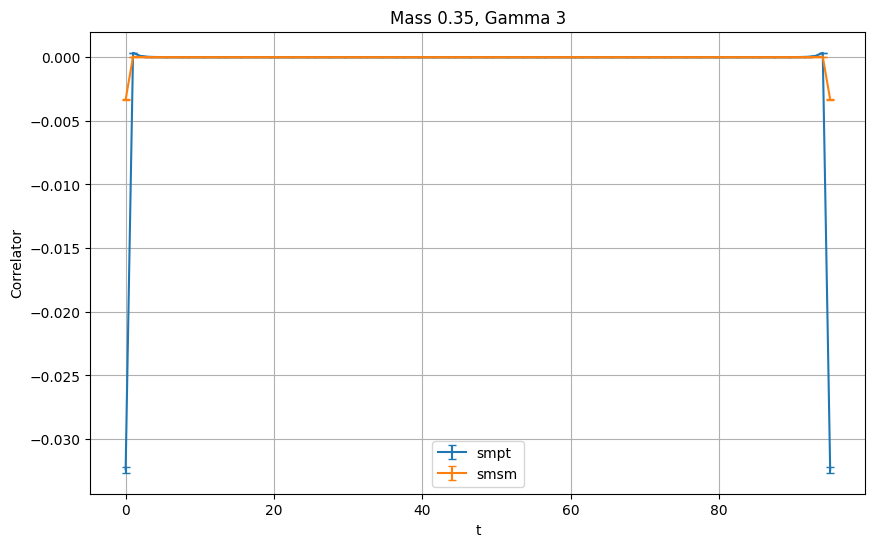

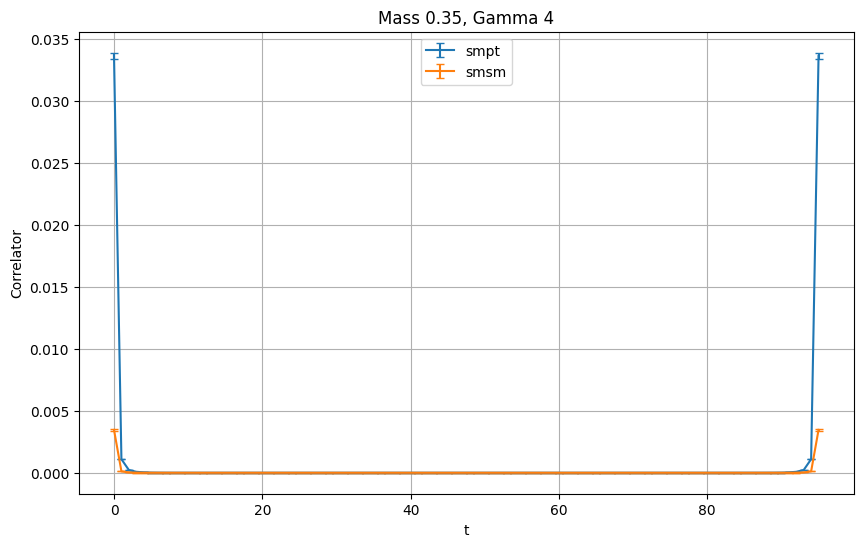

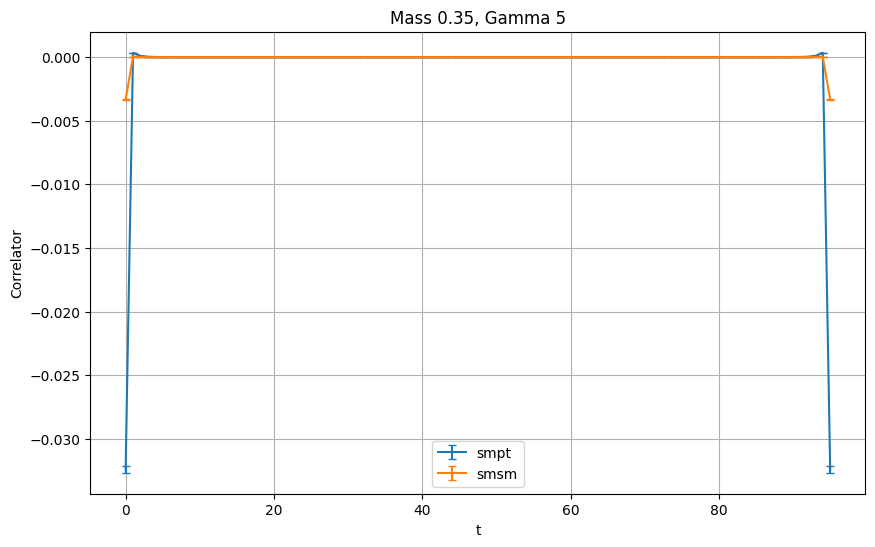

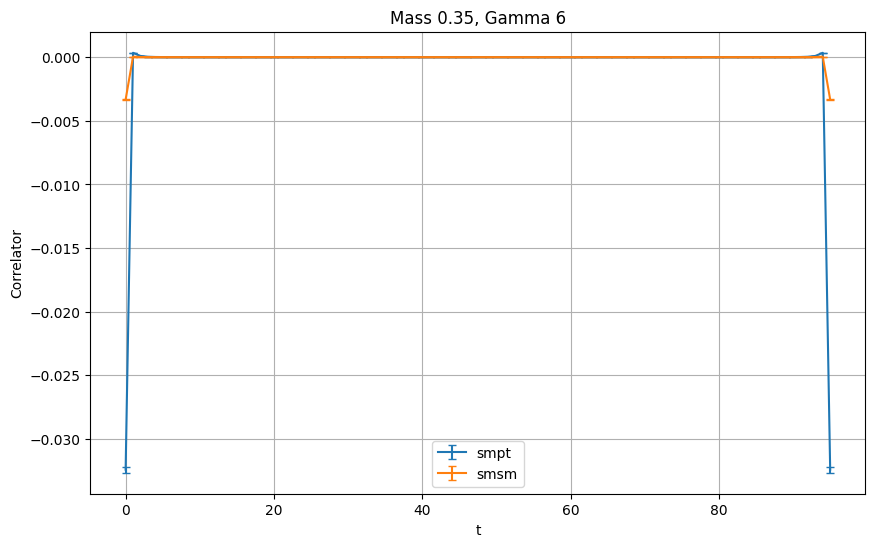

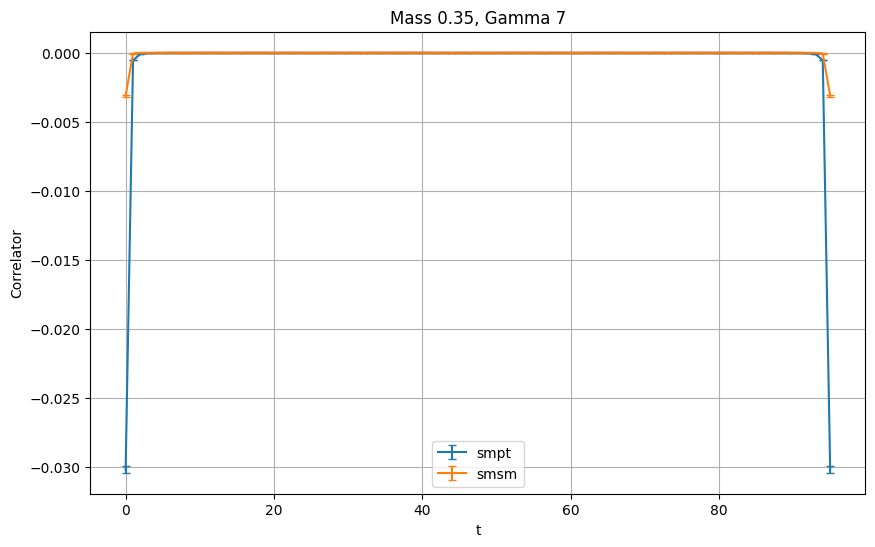

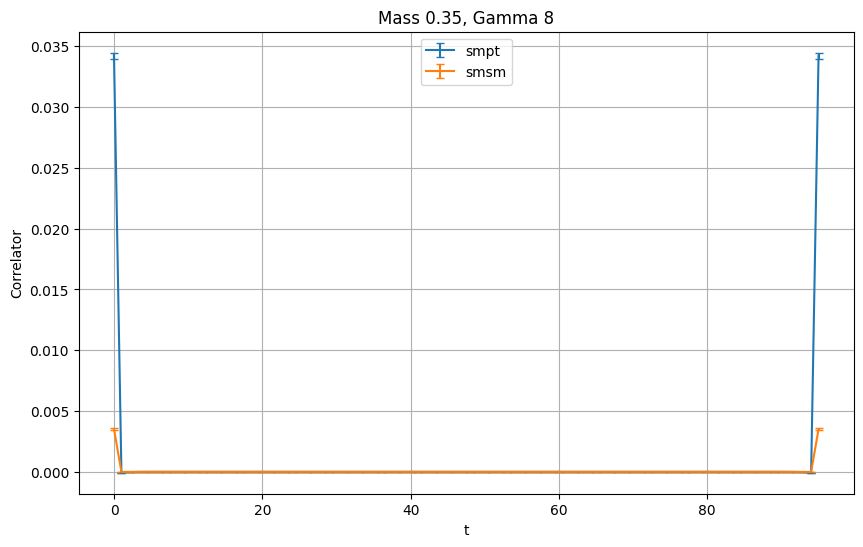

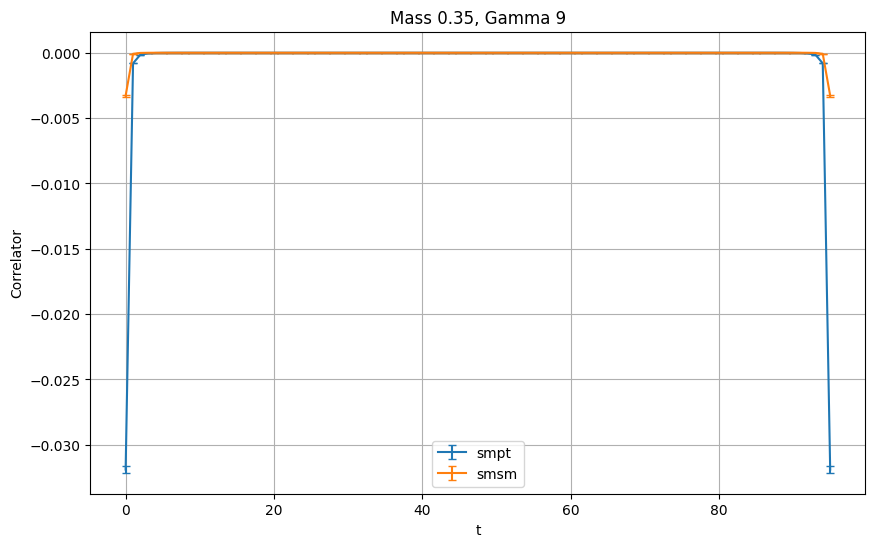

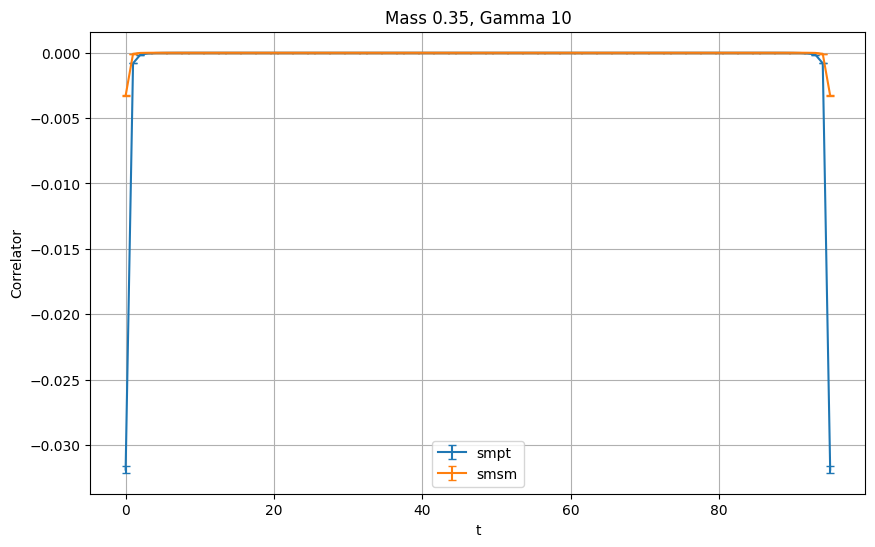

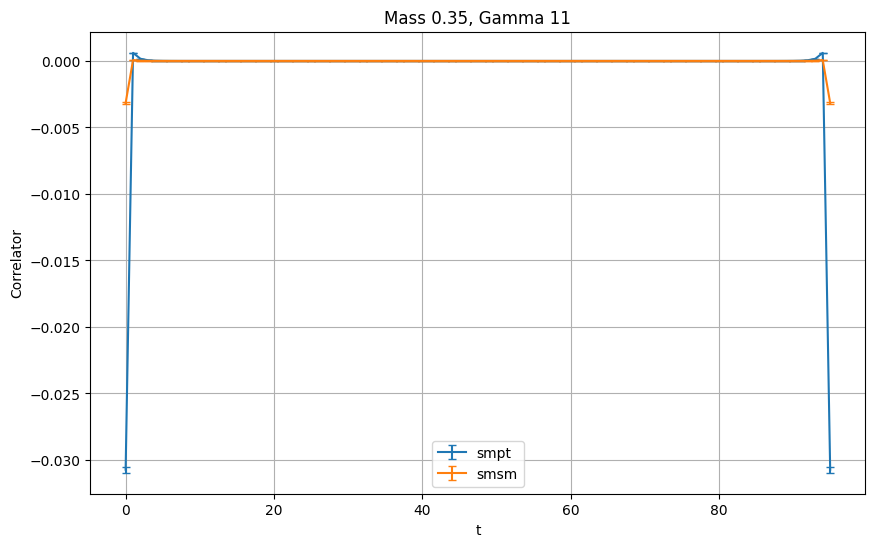

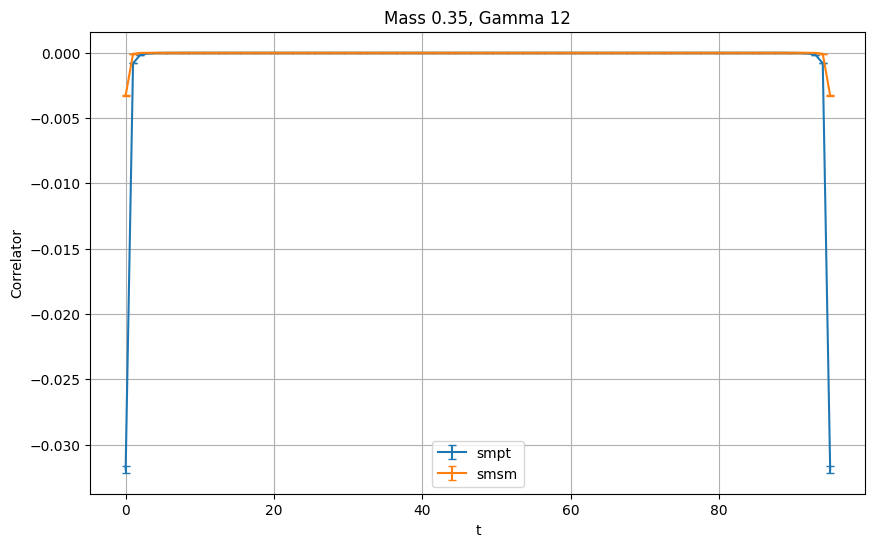

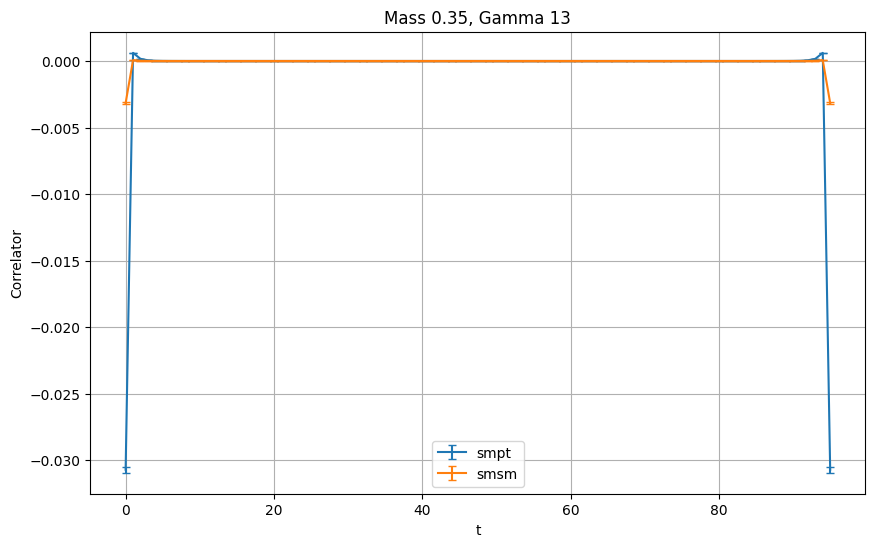

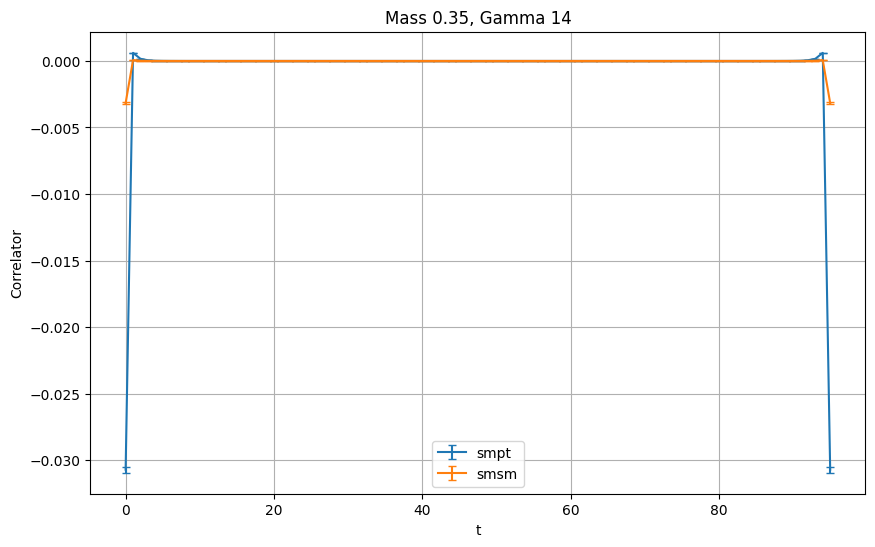

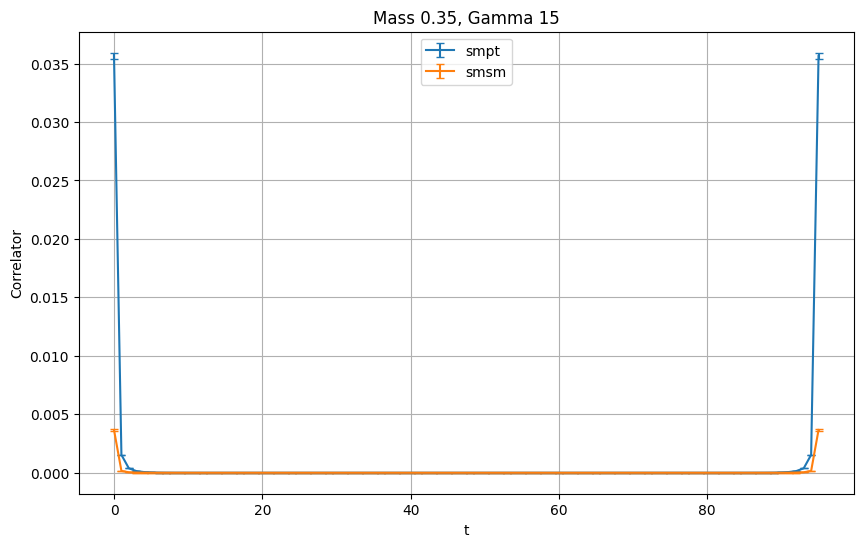

In [21]:
import h5py
import gvar as gv
import numpy as np
import matplotlib.pyplot as plt

averaged_data = {}
with h5py.File("D_s.h5", 'r') as f:
    ds_group = f["D_s"]
    cfg_keys = [key for key in ds_group.keys() if key.startswith("cfg_")]
    num_configs = len(cfg_keys)
    print(f"Found {num_configs} configurations")
    masses = set()
    for cfg_key in cfg_keys:
        for mass_key in ds_group[cfg_key].keys():
            if mass_key.startswith("mass_"):
                masses.add(mass_key.split("_")[1])
    masses = sorted(masses)
    print(f"Available masses: {masses}")
    for mass in masses:
        averaged_data[mass] = {"smpt": {}, "smsm": {}}
        for gamma_idx in range(16):
            correlators = {"smpt": [], "smsm": []}
            for cfg_key in cfg_keys:
                for smear_type in ["smpt", "smsm"]:
                    correlator_key = f"D_s/{cfg_key}/mass_{mass}/{smear_type}/gamma_{gamma_idx}/mom_0/correlator"
                    if correlator_key in f:
                        correlators[smear_type].append(f[correlator_key][:])
            for smear_type in ["smpt", "smsm"]:
                if correlators[smear_type]:
                    avg_correlator = gv.dataset.avg_data(correlators[smear_type])
                    folded_correlator = 0.5 * (avg_correlator + avg_correlator[::-1])
                    averaged_data[mass][smear_type][gamma_idx] = folded_correlator
                    print(f"Folded mass_{mass}, {smear_type}, gamma_{gamma_idx}: {len(correlators[smear_type])} configs, sample: {folded_correlator[0]}")
                else:
                    print(f"No data for mass_{mass}, {smear_type}, gamma_{gamma_idx}")

for mass in averaged_data:
    for gamma_idx in range(16):
        plt.figure(figsize=(10, 6))
        t = np.arange(len(averaged_data[mass]["smpt"].get(gamma_idx, [0])))
        for snk in ["smpt", "smsm"]:
            if gamma_idx in averaged_data[mass][snk]:
                correlator = averaged_data[mass][snk][gamma_idx]
                plt.errorbar(t, gv.mean(correlator), yerr=gv.sdev(correlator), label=f"{snk}", capsize=3)
        plt.title(f"Mass {mass}, Gamma {gamma_idx}")
        plt.xlabel("t")
        plt.ylabel("Correlator")
        plt.legend()
        plt.grid(True)
        plt.show()

In [16]:
effective_mass = {}
effective_wf = {}
for mass in averaged_data:
    for snk in averaged_data[mass]:
        t = np.arange(len(averaged_data[mass][snk]))
        effective_mass[snk] = np.arccosh(
            (np.roll(averaged_data[mass][snk] , -1) + np.roll(averaged_data[mass][snk] , 1))
                /(2*averaged_data[mass][snk] ))
        effective_wf[snk] = 1 / np.cosh(effective_mass[snk] *(t - 1/2)) *averaged_data[mass][snk]


TypeError: unsupported operand type(s) for +: 'dict' and 'dict'

In [ ]:
import h5py
import numpy as np
import argparse
import os
from pathlib import Path

def extract_correlators(hdf5_file_path, output_dir=None, verbose=False):
    """
    Extract correlator data from an HDF5 file into NumPy arrays.
    
    Args:
        hdf5_file_path (str): Path to the HDF5 file.
        output_dir (str, optional): Directory to save .npy files. If None, returns arrays.
        verbose (bool): Print detailed structure and extraction info.
    
    Returns:
        dict: Dictionary of NumPy arrays if output_dir is None, keyed by dataset path.
    """
    correlator_data = {}
    
    with h5py.File(hdf5_file_path, 'r') as h5f:
        if verbose:
            print(f"\nHDF5 file structure for {hdf5_file_path}:")
            def print_structure(name, obj):
                print(name)
            h5f.visititems(print_structure)
        
        for group_name in h5f.keys():
            group = h5f[group_name]
            for subgroup in group.keys():
                if subgroup.startswith('mom_'):
                    mom_group = group[subgroup]
                    for op_pair in mom_group.keys():
                        for dataset_name in mom_group[op_pair].keys():
                            full_path = f"/{group_name}/{subgroup}/{op_pair}/{dataset_name}"
                            dataset = mom_group[op_pair][dataset_name]
                            correlator_array = np.array(dataset, dtype=np.complex128)
                            correlator_data[full_path] = correlator_array
                            if verbose:
                                print(f"Extracted {full_path}: shape {correlator_array.shape}")
                else:
                    # Case where mom_avg=True, no 'mom_' prefix
                    op_group = group[subgroup]
                    for dataset_name in op_group.keys():
                        full_path = f"/{group_name}/{subgroup}/{dataset_name}"
                        dataset = op_group[dataset_name]
                        correlator_array = np.array(dataset, dtype=np.complex128)
                        correlator_data[full_path] = correlator_array
                        if verbose:
                            print(f"Extracted {full_path}: shape {correlator_array.shape}")

    if output_dir:
        output_dir = Path(output_dir)
        output_dir.mkdir(exist_ok=True)
        for path, array in correlator_data.items():
            # Convert path to a valid filename (replace '/' with '_')
            filename = path.replace('/', '_')[1:] + '.npy'
            output_file = output_dir / filename
            np.save(output_file, array)
            if verbose:
                print(f"Saved {output_file}")
    else:
        return correlator_data

SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (639377010.py, line 1)